<a href="https://colab.research.google.com/github/nickdhollman/MS-BAnDS-Google-Colab/blob/BAN-5743-Predictive-Analytics/BAN5743_Analytics_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="trainers.jpg" alt="Trainers in a store" width=550></center>

Sports clothing and athleisure attire is a huge industry, worth approximately $193 billion in 2021 with a strong growth forecast over the next decade! (`Source: https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/`)

In this workbook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

### The data:
You've been provided with four datasets to investigate:

`brands.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product |

`finance.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product |
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal |
| `revenue` | Revenue generated by the product |

`info.csv`

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product |
| `product_id` | Unique product identifier |
| `description` | Description of the product |

`reviews.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating |
| `reviews` | Number of reviews for the product |

 ### IMPORT DATASETS

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
# Loading the data
brands = pd.read_csv("brands.csv")
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

In [ ]:
# Importing libraries
!pip install sidetable
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns

### INITIAL DATA EXPLORATION

In [ ]:
print(brands.head())
print(brands.shape)
print(brands.dtypes)

  product_id   brand
0     AH2430     NaN
1     G27341  Adidas
2     CM0081  Adidas
3     B44832  Adidas
4     D98205  Adidas
(3179, 2)
product_id    object
brand         object
dtype: object


In [ ]:
print(finance.head())
print(finance.shape)
print(finance.dtypes)

  product_id  listing_price  sale_price  discount  revenue
0     AH2430            NaN         NaN       NaN      NaN
1     G27341          75.99       37.99      0.50  1641.17
2     CM0081           9.99        5.99      0.40   398.93
3     B44832          69.99       34.99      0.50  2204.37
4     D98205          79.99       39.99      0.50  5182.70
(3179, 5)
product_id        object
listing_price    float64
sale_price       float64
discount         float64
revenue          float64
dtype: object


In [ ]:
print(info.head())
print(info.shape)
print(info.dtypes)

                                       product_name product_id  \
0                                               NaN     AH2430   
1              Women's adidas Originals Sleek Shoes     G27341   
2                 Women's adidas Swim Puka Slippers     CM0081   
3  Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4          Women's adidas Originals Taekwondo Shoes     D98205   

                                         description  
0                                                NaN  
1  A modern take on adidas sport heritage, tailor...  
2  These adidas Puka slippers for women's come wi...  
3  Inspired by modern tech runners, these women's...  
4  This design is inspired by vintage Taekwondo s...  
(3179, 3)
product_name    object
product_id      object
description     object
dtype: object


In [ ]:
print(reviews.head())
print(reviews.shape)
print(reviews.dtypes)

  product_id  rating  reviews
0     AH2430     NaN      NaN
1     G27341    3.30    24.00
2     CM0081    2.60    37.00
3     B44832    4.10    35.00
4     D98205    3.50    72.00
(3179, 3)
product_id     object
rating        float64
reviews       float64
dtype: object


### EXPLORE NULL VALUES

In [ ]:
brands.isna().sum()

product_id     0
brand         59
dtype: int64

In [ ]:
finance.isna().sum()

product_id        0
listing_price    59
sale_price       59
discount         59
revenue          59
dtype: int64

In [ ]:
info.isna().sum()

product_name    59
product_id       0
description     62
dtype: int64

In [ ]:
reviews.isna().sum()

product_id     0
rating        59
reviews       59
dtype: int64

### MERGE DATASETS

In [ ]:
merged_df = pd.merge(brands, finance, on='product_id', how='inner')
print(merged_df.head(5))

  product_id   brand  listing_price  sale_price  discount  revenue
0     AH2430     NaN            NaN         NaN       NaN      NaN
1     G27341  Adidas          75.99       37.99      0.50  1641.17
2     CM0081  Adidas           9.99        5.99      0.40   398.93
3     B44832  Adidas          69.99       34.99      0.50  2204.37
4     D98205  Adidas          79.99       39.99      0.50  5182.70


In [ ]:
merged_df_ = pd.merge(merged_df, info, on='product_id', how='inner')
print(merged_df_.head(5))

  product_id   brand  listing_price  sale_price  discount  revenue  \
0     AH2430     NaN            NaN         NaN       NaN      NaN   
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   

                                       product_name  \
0                                               NaN   
1              Women's adidas Originals Sleek Shoes   
2                 Women's adidas Swim Puka Slippers   
3  Women's adidas Sport Inspired Questar Ride Shoes   
4          Women's adidas Originals Taekwondo Shoes   

                                         description  
0                                                NaN  
1  A modern take on adidas sport heritage, tailor...  
2  These adidas Puka slippers for women's come wi...  
3  Inspired by modern tech r

In [ ]:
master = pd.merge(merged_df_, reviews, on='product_id', how='inner')
print(master.head(5))

  product_id   brand  listing_price  sale_price  discount  revenue  \
0     AH2430     NaN            NaN         NaN       NaN      NaN   
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   

                                       product_name  \
0                                               NaN   
1              Women's adidas Originals Sleek Shoes   
2                 Women's adidas Swim Puka Slippers   
3  Women's adidas Sport Inspired Questar Ride Shoes   
4          Women's adidas Originals Taekwondo Shoes   

                                         description  rating  reviews  
0                                                NaN     NaN      NaN  
1  A modern take on adidas sport heritage, tailor...    3.30    24.00  
2  These adidas Puka slippers fo

In [ ]:
print(master.shape)
print(master.dtypes)

(3179, 10)
product_id        object
brand             object
listing_price    float64
sale_price       float64
discount         float64
revenue          float64
product_name      object
description       object
rating           float64
reviews          float64
dtype: object


In [ ]:
master.isna().sum()

product_id        0
brand            59
listing_price    59
sale_price       59
discount         59
revenue          59
product_name     59
description      62
rating           59
reviews          59
dtype: int64

### DROP NULL VALUES

In [ ]:
final_df = master.dropna()

In [ ]:
final_df.isna().sum()

product_id       0
brand            0
listing_price    0
sale_price       0
discount         0
revenue          0
product_name     0
description      0
rating           0
reviews          0
dtype: int64

In [ ]:
print(final_df.head())
print(final_df.shape)
print(final_df.dtypes)

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   
5     B75586  Adidas          47.99       19.20      0.60  1555.20   

                                        product_name  \
1               Women's adidas Originals Sleek Shoes   
2                  Women's adidas Swim Puka Slippers   
3   Women's adidas Sport Inspired Questar Ride Shoes   
4           Women's adidas Originals Taekwondo Shoes   
5  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  
1  A modern take on adidas sport heritage, tailor...    3.30    24.00  
2  These adidas Puka slippers for women's come wi...    2.60    37.00  
3  Inspired by modern tech

### EXPLORATORY DATA ANALYSIS

In [ ]:
# Filter categorical variables
categorical_vars = final_df.select_dtypes(include=['object'])
print("Categorical Variables:")
print(categorical_vars.dtypes)

Categorical Variables:
product_id      object
brand           object
product_name    object
description     object
dtype: object


In [ ]:
# Filter continuous variables
continuous_vars = final_df.select_dtypes(include=['float64'])
print("Continuous Variables:")
print(continuous_vars.dtypes)

Continuous Variables:
listing_price    float64
sale_price       float64
discount         float64
revenue          float64
rating           float64
reviews          float64
dtype: object


#### DESCRIPTIVE STATISTICS

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
categorical_vars.stb.freq(['brand'])

brand  count  percent  cumulative_count  cumulative_percent
0  Adidas   2575    82.61              2575               82.61
1    Nike    542    17.39              3117              100.00

In [ ]:
categorical_vars.stb.freq(['product_name'])

product_name  count  percent  \
0         Men's adidas Originals Supercourt Shoes     16     0.51   
1        Women's adidas Originals Sambarose Shoes     15     0.48   
2         Men's adidas Originals Stan Smith Shoes     15     0.48   
3                                 Nike Air Max 90     14     0.45   
4     Men's adidas Originals Continental 80 Shoes     14     0.45   
...                                           ...    ...      ...   
1505                         Air Jordan 1 Nova XX      1     0.03   
1506                          Air Jordan 1 Mid SE      1     0.03   
1507                             Air Jordan 1 Low      1     0.03   
1508          Air Jordan 1 Jester XX Low Laced SE      1     0.03   
1509             Air Jordan 1 Jester XX Low Laced      1     0.03   

      cumulative_count  cumulative_percent  
0                   16                0.51  
1                   31                0.99  
2                   46                1.48  
3                   60                1.92  
4                   74                2.37  
...                ...                 ...  
1505              3113               99.87  
1506              3114               99.90  
1507              3115               99.94  
1508              3116               99.97  
1509              3117              100.00  

[1510 rows x 5 columns]

In [ ]:
categorical_vars.stb.freq(['description'])

description  count  percent  \
0     A well cushioned shoe with a fresher look that...     15     0.48   
1     Stylish and sleek adidas sandals for women are...     13     0.42   
2     Stylish and sleek adidas Hoist sandals for men...     11     0.35   
3     Get maximum support, comfort and a refreshed l...     11     0.35   
4     Aspire to greatness. These running shoes are m...     11     0.35   
...                                                 ...    ...      ...   
1735  30 years after its original release, the Nike ...      1     0.03   
1736  30 years after its original release, the Nike ...      1     0.03   
1737  "We make a good team, my adidas and me." Alway...      1     0.03   
1738  "We make a good team, my adidas and me." Alway...      1     0.03   
1739  "We make a good team, my adidas and me." Alway...      1     0.03   

      cumulative_count  cumulative_percent  
0                   15                0.48  
1                   28                0.90  
2                   39                1.25  
3                   50                1.60  
4                   61                1.96  
...                ...                 ...  
1735              3113               99.87  
1736              3114               99.90  
1737              3115               99.94  
1738              3116               99.97  
1739              3117              100.00  

[1740 rows x 5 columns]

In [ ]:
continuous_vars.describe()

listing_price  sale_price  discount  revenue  rating  reviews
count        3117.00     3117.00   3117.00  3117.00 3117.00  3117.00
mean           69.79       60.04      0.28  3947.13    3.27    41.55
std            46.56       41.87      0.22  4435.50    1.39    31.37
min             0.00        4.49      0.00     0.00    0.00     0.00
25%            45.99       29.99      0.00   863.89    2.60    12.00
50%            59.99       45.99      0.40  2735.28    3.50    39.00
75%            89.99       77.99      0.50  5341.45    4.40    69.00
max           299.99      365.00      0.60 64203.93    5.00   223.00

#### PLOT CONTINUOUS VARIABLES

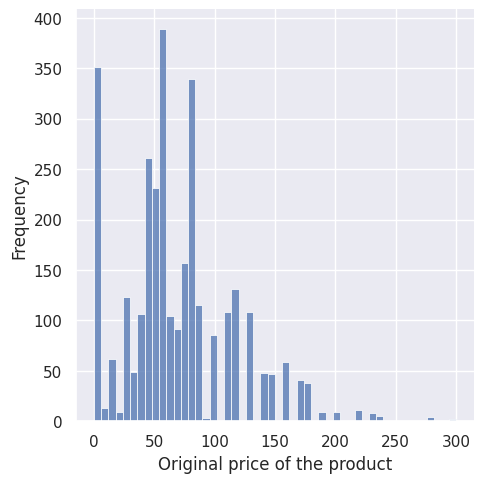

In [ ]:
sns.set_theme()
ax = sns.displot(final_df, x="listing_price")
ax.set(xlabel='Original price of the product', ylabel='Frequency')
plt.show()

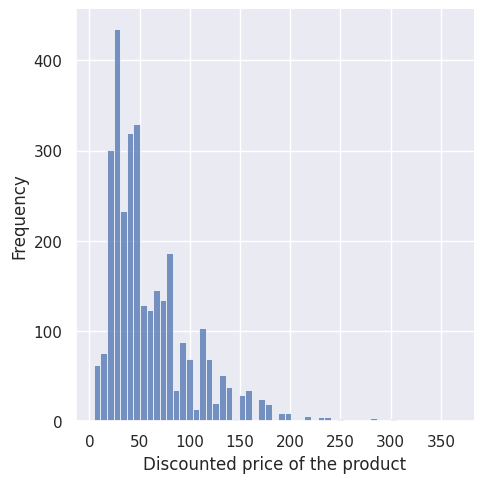

In [ ]:
ax = sns.displot(final_df, x="sale_price")
ax.set(xlabel='Discounted price of the product', ylabel='Frequency')
plt.show()

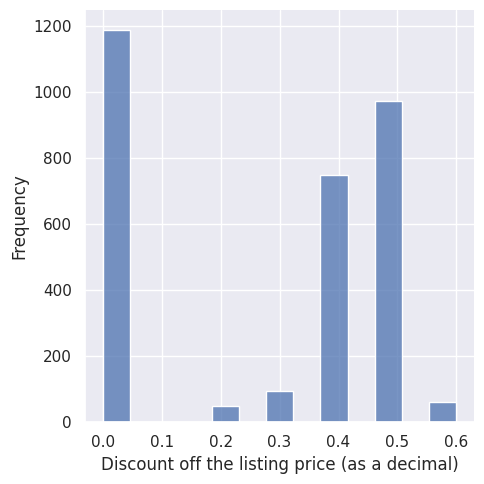

In [ ]:
ax = sns.displot(final_df, x="discount")
ax.set(xlabel='Discount off the listing price (as a decimal)', ylabel='Frequency')
plt.show()

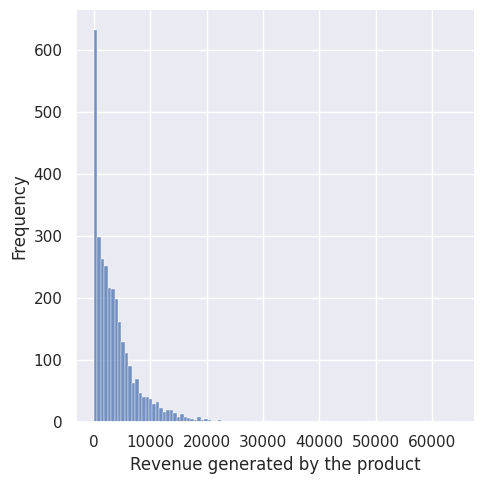

In [ ]:
ax = sns.displot(final_df, x="revenue")
ax.set(xlabel='Revenue generated by the product', ylabel='Frequency')
plt.show()

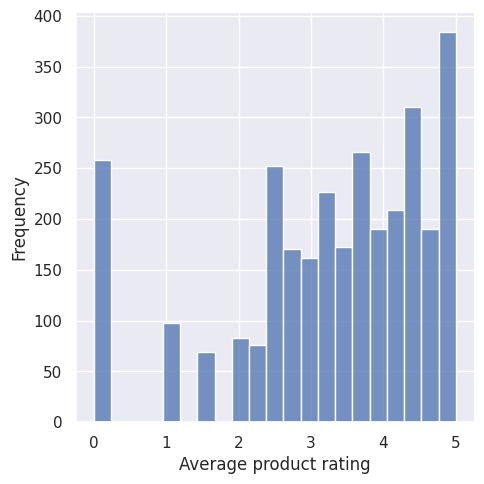

In [ ]:
ax = sns.displot(final_df, x="rating")
ax.set(xlabel='Average product rating', ylabel='Frequency')
plt.show()

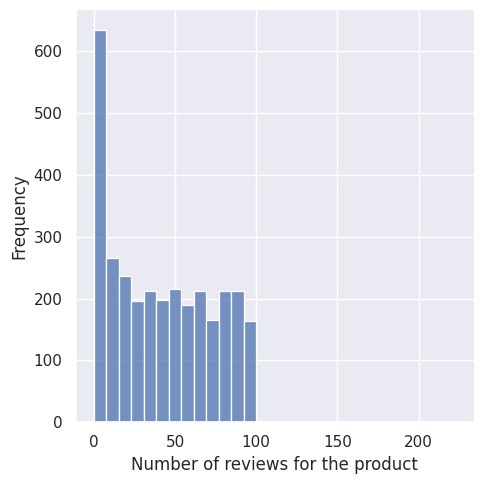

In [ ]:
ax = sns.displot(final_df, x="reviews")
ax.set(xlabel='Number of reviews for the product', ylabel='Frequency')
plt.show()

#### PLOT CATEGORICAL VARIABLES

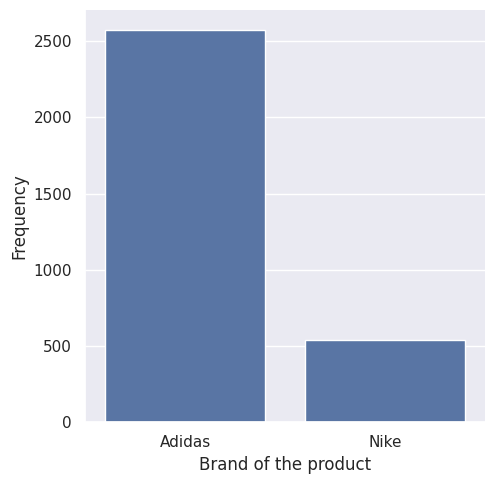

In [ ]:
ax = sns.catplot(final_df, x="brand", kind='count')
ax.set(xlabel='Brand of the product', ylabel='Frequency')
plt.show()

# RESEARCH Q1. What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

##### STEP 1. Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite".

In [ ]:
print(final_df['listing_price'].agg(['min','median', 'mean', 'std', 'max']))
print(final_df['listing_price'].quantile([0.25, 0.75]))

min        0.00
median    59.99
mean      69.79
std       46.56
max      299.99
Name: listing_price, dtype: float64
0.25   45.99
0.75   89.99
Name: listing_price, dtype: float64


In [ ]:
bins = [0.00, 45.99, 59.99, 89.99, np.inf]

In [ ]:
group = ['Budget', 'Average', 'Expensive', 'Elite']

In [ ]:
final_df['price_label'] = pd.cut(final_df['listing_price'], bins=bins, labels=group, include_lowest=True)
Price_cat = final_df.groupby("price_label")[["listing_price"]].agg(["min", "max"])
print(Price_cat)
print(final_df.stb.freq(['price_label']))

            listing_price       
                      min    max
price_label                     
Budget               0.00  45.99
Average             47.95  59.99
Expensive           62.99  89.99
Elite               94.95 299.99
  price_label  count  percent  cumulative_count  cumulative_percent
0      Budget    931    29.87               931               29.87
1   Expensive    806    25.86              1737               55.73
2       Elite    717    23.00              2454               78.73
3     Average    663    21.27              3117              100.00


<ipython-input-604-7b8b94242dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-604-7b8b94242dd0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.11/dist-packages/sidetable/sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


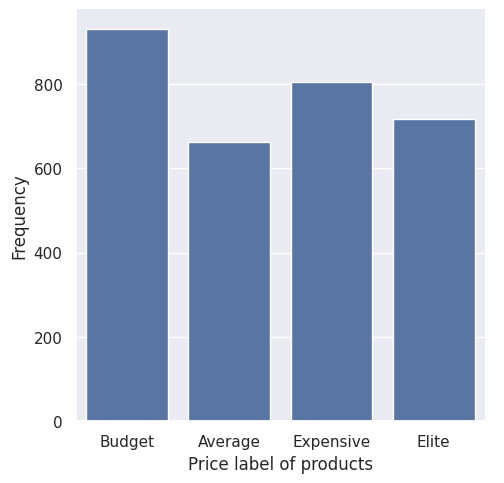

In [ ]:
ax = sns.catplot(final_df, x="price_label", kind='count')
ax.set(xlabel='Price label of products', ylabel='Frequency')
plt.show()

##### STEP 2. Store as a pandas DataFrame called adidas_vs_nike containing columns: "brand", "price_label", "num_products", and "mean_revenue". All numeric values should be rounded to two decimal places.

In [ ]:
adidas_vs_nike_ = final_df.groupby(["brand", "price_label"]).agg(total_revenue=('revenue', 'sum'), num_products=('product_id', 'count'), mean_revenue=('revenue', 'mean')).reset_index()
print(adidas_vs_nike_)

    brand price_label  total_revenue  num_products  mean_revenue
0  Adidas      Budget     1156998.22           574       2015.68
1  Adidas     Average     1988123.85           655       3035.30
2  Adidas   Expensive     3507762.33           759       4621.56
3  Adidas       Elite     4873734.68           587       8302.78
4    Nike      Budget      569889.17           357       1596.33
5    Nike     Average        5404.74             8        675.59
6    Nike   Expensive       23526.45            47        500.56
7    Nike       Elite      177768.26           130       1367.45


<ipython-input-174-77b88750db65>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike_ = final_df.groupby(["brand", "price_label"]).agg(total_revenue=('revenue', 'sum'), num_products=('product_id', 'count'), mean_revenue=('revenue', 'mean')).reset_index()


In [ ]:
adidas_vs_nike = final_df.groupby(["brand", "price_label"]).agg(num_products=('product_id', 'count'), mean_revenue=('revenue', 'mean')).reset_index()
print(adidas_vs_nike)

    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


<ipython-input-175-3b27ebe7dc59>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike = final_df.groupby(["brand", "price_label"]).agg(num_products=('product_id', 'count'), mean_revenue=('revenue', 'mean')).reset_index()


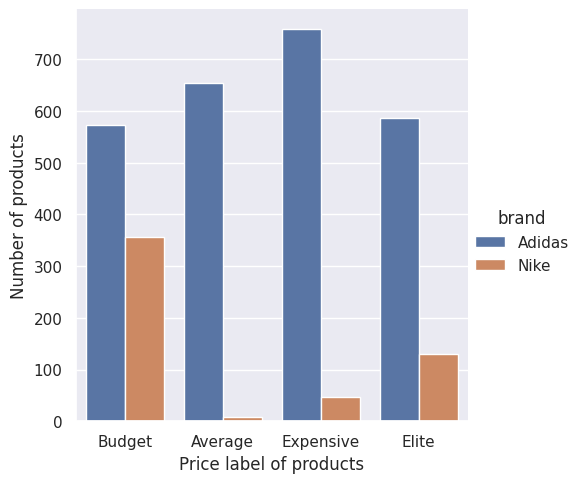

In [ ]:
ax = sns.catplot(adidas_vs_nike, x="price_label", y="num_products", hue='brand', kind='bar')
ax.set(xlabel='Price label of products', ylabel='Number of products')
plt.show()

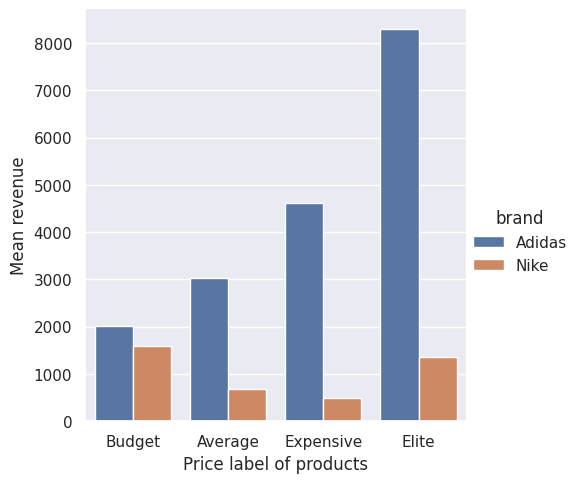

In [ ]:
ax = sns.catplot(adidas_vs_nike, x="price_label", y="mean_revenue", hue='brand', kind='bar')
ax.set(xlabel='Price label of products', ylabel='Mean revenue')
plt.show()

In [ ]:
# NIKE PRODUCTS ONLY
nike = adidas_vs_nike[adidas_vs_nike['brand'] == 'Nike']
print(nike.head())

  brand price_label  num_products  mean_revenue
4  Nike      Budget           357       1596.33
5  Nike     Average             8        675.59
6  Nike   Expensive            47        500.56
7  Nike       Elite           130       1367.45


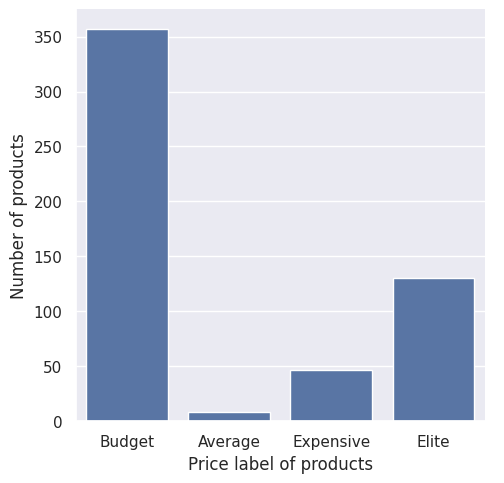

In [ ]:
ax = sns.catplot(nike, x="price_label", y="num_products", kind='bar')
ax.set(xlabel='Price label of products', ylabel='Number of products')
plt.show()

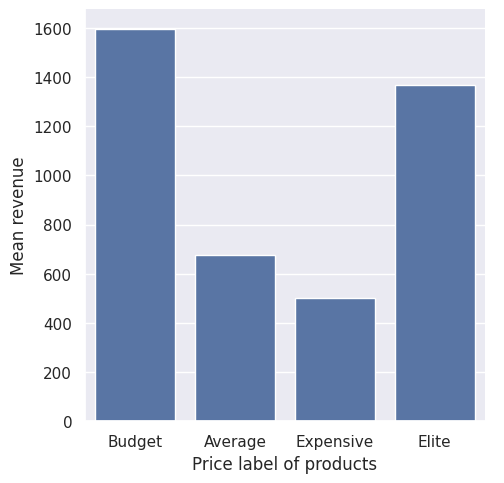

In [ ]:
ax = sns.catplot(nike, x="price_label", y="mean_revenue", kind='bar')
ax.set(xlabel='Price label of products', ylabel='Mean revenue')
plt.show()

In [ ]:
# ADIDAS PRODUCTS ONLY
adidas = adidas_vs_nike[adidas_vs_nike['brand'] == 'Adidas']
print(adidas.head())

    brand price_label  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78


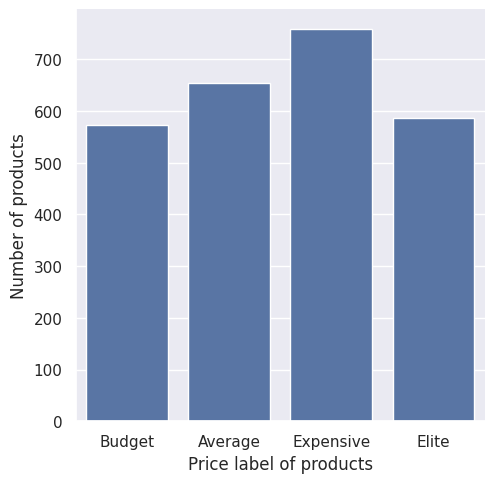

In [ ]:
ax = sns.catplot(adidas, x="price_label", y="num_products", kind='bar')
ax.set(xlabel='Price label of products', ylabel='Number of products')
plt.show()

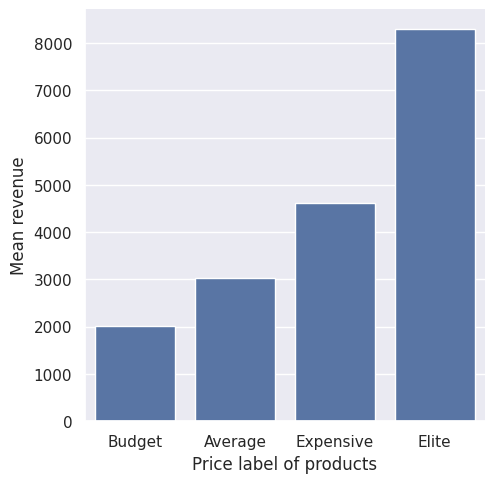

In [ ]:
ax = sns.catplot(adidas, x="price_label", y="mean_revenue", kind='bar')
ax.set(xlabel='Price label of products', ylabel='Mean revenue')
plt.show()

# RESEARCH Q2. Do any differences exist between the word count of a product's description and its mean rating?

##### STEP 1. Split product description length into bins of 100-character intervals and calculate the average rating and total number of reviews.

In [ ]:
final_df['description_length_n'] = final_df['description'].str.len()
print(final_df.head())
print(final_df.dtypes)

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   
5     B75586  Adidas          47.99       19.20      0.60  1555.20   

                                        product_name  \
1               Women's adidas Originals Sleek Shoes   
2                  Women's adidas Swim Puka Slippers   
3   Women's adidas Sport Inspired Questar Ride Shoes   
4           Women's adidas Originals Taekwondo Shoes   
5  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  \
1  A modern take on adidas sport heritage, tailor...    3.30    24.00   
2  These adidas Puka slippers for women's come wi...    2.60    37.00   
3  Inspired by modern t

<ipython-input-610-5c26d4c92bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
final_df['description_length_n'].describe()

count   3117.00
mean     265.55
std       74.77
min       14.00
25%      215.00
50%      258.00
75%      302.00
max      687.00
Name: description_length_n, dtype: float64

In [ ]:
bins = [0.00, 100.00, 200.00, 300.00, 400.00, 500.00, 600.00, np.inf]

In [ ]:
group = ['0 - 100', '101 - 200', '201 - 300', '301 - 400', '401 - 500', '501 - 600', '601 - 700']

In [ ]:
final_df['description_length'] = pd.cut(final_df['description_length_n'], bins=bins, labels=group, include_lowest=True)
description_length = final_df.groupby("description_length")[["description_length_n"]].agg(["min", "max"])
print(description_length)
print(final_df.stb.freq(['description_length']))

                   description_length_n     
                                    min  max
description_length                          
0 - 100                              14  100
101 - 200                           104  200
201 - 300                           201  300
301 - 400                           301  400
401 - 500                           401  492
501 - 600                           507  591
601 - 700                           605  687
  description_length  count  percent  cumulative_count  cumulative_percent
0          201 - 300   1785    57.27              1785               57.27
1          301 - 400    651    20.89              2436               78.15
2          101 - 200    526    16.88              2962               95.03
3          401 - 500    118     3.79              3080               98.81
4          601 - 700     15     0.48              3095               99.29
5          501 - 600     15     0.48              3110               99.78
6            0 - 100     

<ipython-input-614-ea36f02eb47f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-614-ea36f02eb47f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.11/dist-packages/sidetable/sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


##### STEP 2. Store the results as a pandas DataFrame called description_lengths containing columns: "description_length", "mean_rating", "total_reviews". Again, round numeric values to two decimal places.

In [ ]:
description_lengths = final_df.groupby(["description_length"]).agg(mean_rating=('rating', 'mean'), total_reviews=('reviews', 'count')).reset_index()
print(description_lengths)

  description_length  mean_rating  total_reviews
0            0 - 100         2.26              7
1          101 - 200         3.19            526
2          201 - 300         3.28           1785
3          301 - 400         3.29            651
4          401 - 500         3.35            118
5          501 - 600         3.12             15
6          601 - 700         3.65             15


<ipython-input-616-df63833c2e1b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


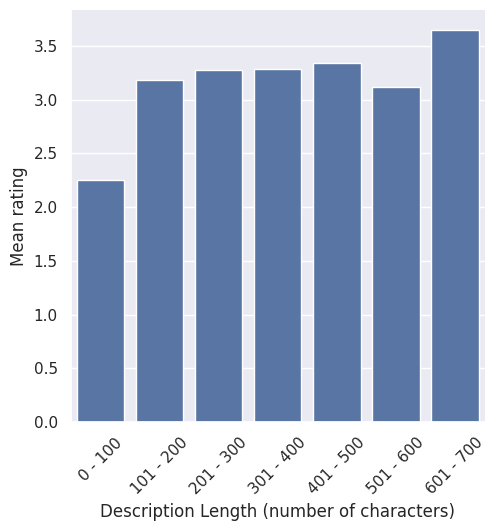

In [ ]:
ax = sns.catplot(description_lengths, x="description_length", y="mean_rating", kind='bar')
ax.set(xlabel='Description Length (number of characters)', ylabel='Mean rating')
plt.xticks(rotation=45)
plt.show()

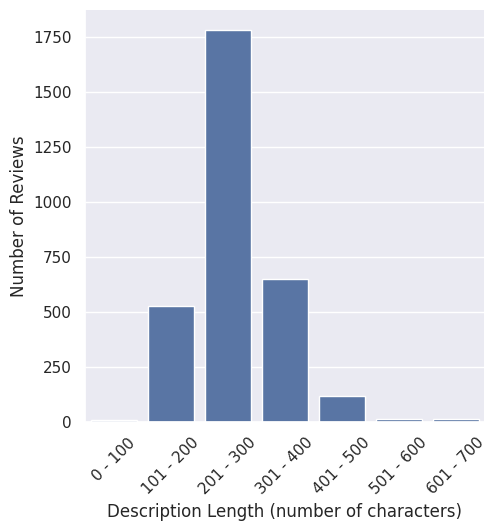

In [ ]:
ax = sns.catplot(description_lengths, x="description_length", y="num_reviews", kind='bar')
ax.set(xlabel='Description Length (number of characters)', ylabel='Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# RESEARCH Q3. Can we predict revenue based on the information provided? Feature engineering will be required from text data

You will need to do some text analytics and add at least 3 categories/topics/ concepts from the description information to add to the predictive model.

### WORD CLOUD

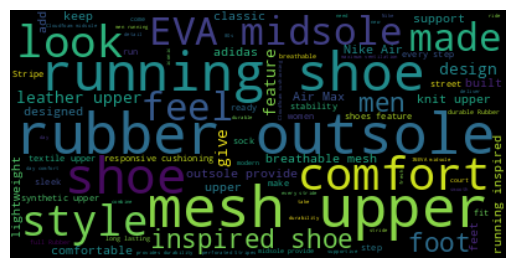

In [ ]:
# Word Cloud
from wordcloud import WordCloud, STOPWORDS
word_clo = WordCloud(stopwords=set(STOPWORDS)).generate(final_df['description'].str.cat())
plt.imshow(word_clo, interpolation='bilinear')
plt.axis('off')
plt.show()

### REGULAR EXPRESSION

In [ ]:
# regular expression
import re

In [ ]:
# Define multiple patterns
patterns = [r"EVA", r"knit upper"]

# Initialize a dictionary to store the results
results = {pattern: [] for pattern in patterns}

# Iterate over the rows in the 'description' column
for pattern in patterns:
    # Create a new column for each pattern in final_df
    final_df[pattern] = final_df['description'].apply(lambda x: 1 if re.search(pattern, x) else 0)

# Print the updated final_df
print(final_df)

      product_id   brand  listing_price  sale_price  discount  revenue  \
1         G27341  Adidas          75.99       37.99      0.50  1641.17   
2         CM0081  Adidas           9.99        5.99      0.40   398.93   
3         B44832  Adidas          69.99       34.99      0.50  2204.37   
4         D98205  Adidas          79.99       39.99      0.50  5182.70   
5         B75586  Adidas          47.99       19.20      0.60  1555.20   
...          ...     ...            ...         ...       ...      ...   
3174  AT6100-606    Nike           0.00       64.95      0.00     0.00   
3175  CT9155-063    Nike           0.00      139.95      0.00   251.91   
3176  CI1236-100    Nike         159.95      127.97      0.00   230.35   
3177  AH6799-300    Nike           0.00      169.95      0.00  1223.64   
3178  CJ9585-600    Nike          89.95       62.97      0.00     0.00   

                                           product_name  \
1                  Women's adidas Originals Sleek Sh

<ipython-input-207-45578870c39d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[pattern] = final_df['description'].apply(lambda x: 1 if re.search(pattern, x) else 0)
<ipython-input-207-45578870c39d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[pattern] = final_df['description'].apply(lambda x: 1 if re.search(pattern, x) else 0)


### BAG OF WORDS

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

In [ ]:
Counter(word_tokenize(final_df['description'].str.cat(sep=' '))).most_common(50)

[('.', 9517),
 ('the', 4969),
 ('a', 4856),
 ('and', 4534),
 (',', 3645),
 ('with', 2951),
 ('for', 2935),
 ('shoes', 2293),
 ('upper', 2137),
 ('The', 2106),
 ('to', 1997),
 ('of', 1631),
 ('in', 1428),
 ('on', 1375),
 ('your', 1360),
 ('you', 1330),
 ('These', 1320),
 ('cushioning', 1196),
 ('comfort', 1184),
 ("'s", 1095),
 ('outsole', 1080),
 ('midsole', 1055),
 ('that', 1025),
 ('adidas', 967),
 ('A', 865),
 ('these', 862),
 ('look', 809),
 ('style', 808),
 ('running', 783),
 ('mesh', 779),
 ('lightweight', 739),
 ('is', 648),
 ('provides', 642),
 ('men', 632),
 ('design', 630),
 ('an', 609),
 ('Nike', 608),
 ('while', 550),
 ('have', 525),
 ('rubber', 511),
 ('3-Stripes', 505),
 ('leather', 487),
 ('are', 471),
 ('They', 468),
 ('feel', 457),
 ('support', 455),
 ('EVA', 452),
 ('Air', 440),
 ('it', 438),
 ('comfortable', 434)]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
text_stop = [word for word in word_tokenize(final_df['description'].str.cat(sep=' '))  if word.isalpha() if word not in stopwords.words('english')]
common_words = Counter(text_stop).most_common(50)
print(common_words)

[('shoes', 2293), ('upper', 2137), ('The', 2106), ('These', 1320), ('cushioning', 1196), ('comfort', 1184), ('outsole', 1080), ('midsole', 1055), ('adidas', 967), ('A', 865), ('look', 809), ('style', 808), ('running', 783), ('mesh', 779), ('lightweight', 739), ('provides', 642), ('men', 632), ('design', 630), ('Nike', 608), ('rubber', 511), ('leather', 487), ('They', 468), ('feel', 457), ('support', 455), ('EVA', 452), ('Air', 440), ('comfortable', 434), ('soft', 422), ('fit', 396), ('durability', 394), ('every', 383), ('breathable', 376), ('heel', 372), ('classic', 350), ('foot', 348), ('feature', 344), ('modern', 336), ('Rubber', 333), ('durable', 330), ('feet', 295), ('women', 285), ('stability', 274), ('keep', 268), ('suede', 267), ('synthetic', 266), ('give', 266), ('made', 266), ('shoe', 265), ('knit', 264), ('step', 257)]


In [ ]:
#copy df for bow
bow_df = final_df.copy()
#drop EVA and knit upper columns created
bow_df = bow_df.drop(['EVA', 'knit upper'], axis=1)

In [ ]:
common_word_list = [word for word, _ in common_words]
# Add a new column for each common word in the bow_df dataframe
for word in common_word_list:
    # Create a new column that stores 1 if the word is present in the description, otherwise 0
    bow_df[word] = bow_df['description'].apply(lambda x: 1 if word.lower() in word_tokenize(x.lower()) else 0)

# Check the updated DataFrame
print(bow_df.head())

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   
5     B75586  Adidas          47.99       19.20      0.60  1555.20   

                                        product_name  \
1               Women's adidas Originals Sleek Shoes   
2                  Women's adidas Swim Puka Slippers   
3   Women's adidas Sport Inspired Questar Ride Shoes   
4           Women's adidas Originals Taekwondo Shoes   
5  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  ...  \
1  A modern take on adidas sport heritage, tailor...    3.30    24.00  ...   
2  These adidas Puka slippers for women's come wi...    2.60    37.00  ...   
3  Inspi

##### CREATE CATEGORIES BASED OFF BAG OF WORDS VARIABLES CREATED

In [ ]:
print(bow_df.columns)

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews',
       'price_label', 'description_length_n', 'description_length', 'shoes',
       'upper', 'The', 'These', 'cushioning', 'comfort', 'outsole', 'midsole',
       'adidas', 'A', 'look', 'style', 'running', 'mesh', 'lightweight',
       'provides', 'men', 'design', 'Nike', 'rubber', 'leather', 'They',
       'feel', 'support', 'EVA', 'Air', 'comfortable', 'soft', 'fit',
       'durability', 'every', 'breathable', 'heel', 'classic', 'foot',
       'feature', 'modern', 'Rubber', 'durable', 'feet', 'women', 'stability',
       'keep', 'suede', 'synthetic', 'give', 'made', 'shoe', 'knit', 'step'],
      dtype='object')


In [ ]:
#drop the following columns: shoes, upper, The, These, outsole, midsole, adidas, A, look, style, provides, men, design, Nike, rubber, They, feel, support, fit, durability, every, heel, foot, feature, synthetic, give, made, shoe, knit, step
bow_df = bow_df.drop(['shoes', 'upper', 'The', 'These', 'outsole', 'midsole', 'adidas', 'A', 'look', 'style', 'provides', 'men', 'design', 'Nike', 'rubber', 'They', 'feel', 'support', 'fit', 'durability', 'every', 'heel', 'foot', 'feature', 'Rubber', 'feet', 'women', 'synthetic', 'give', 'made', 'shoe', 'knit', 'step'], axis=1)

In [ ]:
print(bow_df.columns)

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews',
       'price_label', 'description_length_n', 'description_length',
       'cushioning', 'comfort', 'running', 'mesh', 'lightweight', 'leather',
       'EVA', 'Air', 'comfortable', 'soft', 'breathable', 'classic', 'modern',
       'durable', 'stability', 'keep', 'suede'],
      dtype='object')


In [ ]:
bow_df = bow_df.drop(['keep'], axis=1)
print(bow_df.columns)

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews',
       'price_label', 'description_length_n', 'description_length',
       'cushioning', 'comfort', 'running', 'mesh', 'lightweight', 'leather',
       'EVA', 'Air', 'comfortable', 'soft', 'breathable', 'classic', 'modern',
       'durable', 'stability', 'suede'],
      dtype='object')


### SENTIMENT ANALYSIS

In [ ]:
sentiment_df = bow_df.copy()
print(sentiment_df.columns)

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews',
       'price_label', 'description_length_n', 'description_length',
       'cushioning', 'comfort', 'running', 'mesh', 'lightweight', 'leather',
       'EVA', 'Air', 'comfortable', 'soft', 'breathable', 'classic', 'modern',
       'durable', 'stability', 'suede'],
      dtype='object')


In [ ]:
from textblob import TextBlob

In [ ]:
# Applying text blob sentiment
def polarity(t):
    a = TextBlob(t).sentiment
    return a[0]

def subjectivity(t):
    a = TextBlob(t).sentiment
    return a[1]

sentiment_df['polarity'] = sentiment_df.apply(lambda t: polarity(t['description']), axis=1)
sentiment_df['subjectivity'] = sentiment_df.apply(lambda t: subjectivity(t['description']), axis=1)
print(sentiment_df.head())
print(sentiment_df.columns)

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99      0.50  1641.17   
2     CM0081  Adidas           9.99        5.99      0.40   398.93   
3     B44832  Adidas          69.99       34.99      0.50  2204.37   
4     D98205  Adidas          79.99       39.99      0.50  5182.70   
5     B75586  Adidas          47.99       19.20      0.60  1555.20   

                                        product_name  \
1               Women's adidas Originals Sleek Shoes   
2                  Women's adidas Swim Puka Slippers   
3   Women's adidas Sport Inspired Questar Ride Shoes   
4           Women's adidas Originals Taekwondo Shoes   
5  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  ...  \
1  A modern take on adidas sport heritage, tailor...    3.30    24.00  ...   
2  These adidas Puka slippers for women's come wi...    2.60    37.00  ...   
3  Inspi

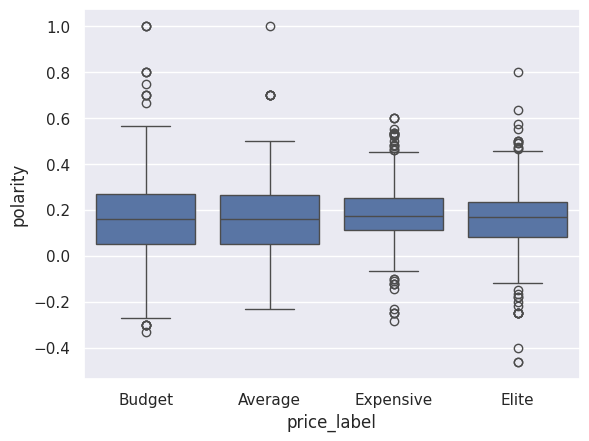

In [ ]:
# Polarity and Rating
sns.boxplot(data=sentiment_df, x='price_label', y='polarity')
plt.show()

### PREDICTIVE MODELING

DATASET

In [ ]:
print(sentiment_df.columns)
print(sentiment_df.dtypes)
print(sentiment_df.shape)

Index(['product_id', 'brand', 'listing_price', 'sale_price', 'discount',
       'revenue', 'product_name', 'description', 'rating', 'reviews',
       'price_label', 'description_length_n', 'description_length',
       'cushioning', 'comfort', 'running', 'mesh', 'lightweight', 'leather',
       'EVA', 'Air', 'comfortable', 'soft', 'breathable', 'classic', 'modern',
       'durable', 'stability', 'suede', 'polarity', 'subjectivity'],
      dtype='object')
product_id                object
brand                     object
listing_price            float64
sale_price               float64
discount                 float64
revenue                  float64
product_name              object
description               object
rating                   float64
reviews                  float64
price_label             category
description_length_n       int64
description_length      category
cushioning                 int64
comfort                    int64
running                    int64
mesh          

COLLAPSE DESCRIPTION LENGTH COLUMNS

In [ ]:
print(sentiment_df.stb.freq(['description_length']))

  description_length  count  percent  cumulative_count  cumulative_percent
0          201 - 300   1785    57.27              1785               57.27
1          301 - 400    651    20.89              2436               78.15
2          101 - 200    526    16.88              2962               95.03
3          401 - 500    118     3.79              3080               98.81
4          601 - 700     15     0.48              3095               99.29
5          501 - 600     15     0.48              3110               99.78
6            0 - 100      7     0.22              3117              100.00


/usr/local/lib/python3.11/dist-packages/sidetable/sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = self._obj.groupby(cols).size().reset_index(


In [ ]:
def descrip_length_recode(val):
    if val=='201 - 300':
        return '201 - 300'
    elif val=='301 - 400':
        return '301 - 400'
    elif val=='101 - 200':
        return '0 - 200'
    elif val=='401 - 500':
        return '>= 401'
    elif val=='601 - 700':
        return '>= 401'
    elif val=='501 - 600':
        return '>= 401'
    elif val=='0 - 100':
        return '0 - 200'

In [ ]:
sentiment_df['description_cat'] = sentiment_df['description_length'].map(descrip_length_recode)
print(sentiment_df.stb.freq(['description_cat']))

  description_cat  count  percent  cumulative_count  cumulative_percent
0       201 - 300   1785    57.27              1785               57.27
1       301 - 400    651    20.89              2436               78.15
2         0 - 200    533    17.10              2969               95.25
3          >= 401    148     4.75              3117              100.00


In [ ]:
print(sentiment_df.stb.freq(['price_label']))

  price_label  count  percent  cumulative_count  cumulative_percent
0      Budget    931    29.87               931               29.87
1   Expensive    806    25.86              1737               55.73
2       Elite    717    23.00              2454               78.73
3     Average    663    21.27              3117              100.00


/usr/local/lib/python3.11/dist-packages/sidetable/sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = self._obj.groupby(cols).size().reset_index(


TRANSFORMATION OF OUTCOME, ONE HOT ENCODING, PREP FOR ANALYSIS

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
encoder = OneHotEncoder()

In [ ]:
encoded_df = pd.get_dummies(sentiment_df, columns=['brand', 'price_label', 'description_cat'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{encoded_df}\n")

One-Hot Encoded Data using Pandas:
      product_id  listing_price  sale_price  discount  revenue  \
1         G27341          75.99       37.99      0.50  1641.17   
2         CM0081           9.99        5.99      0.40   398.93   
3         B44832          69.99       34.99      0.50  2204.37   
4         D98205          79.99       39.99      0.50  5182.70   
5         B75586          47.99       19.20      0.60  1555.20   
...          ...            ...         ...       ...      ...   
3174  AT6100-606           0.00       64.95      0.00     0.00   
3175  CT9155-063           0.00      139.95      0.00   251.91   
3176  CI1236-100         159.95      127.97      0.00   230.35   
3177  AH6799-300           0.00      169.95      0.00  1223.64   
3178  CJ9585-600          89.95       62.97      0.00     0.00   

                                           product_name  \
1                  Women's adidas Originals Sleek Shoes   
2                     Women's adidas Swim Puka Slipper

#### FOR SOME REASON THIS IS RESULTING IN MISSING VALUES - use pd.get_dummies instead

In [ ]:
categorical_columns = ['brand', 'price_label', 'description_cat']
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(sentiment_df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded_sklearn = pd.concat([sentiment_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded_sklearn.drop(categorical_columns, axis=1)

# Print the resulting DataFrame
print(f"One-Hot Encoded Data using Sklearn : \n{df_encoded}")

One-Hot Encoded Data using Sklearn : 
     product_id  listing_price  sale_price  discount  revenue  \
1        G27341          75.99       37.99      0.50  1641.17   
2        CM0081           9.99        5.99      0.40   398.93   
3        B44832          69.99       34.99      0.50  2204.37   
4        D98205          79.99       39.99      0.50  5182.70   
5        B75586          47.99       19.20      0.60  1555.20   
...         ...            ...         ...       ...      ...   
2956        NaN            NaN         NaN       NaN      NaN   
3006        NaN            NaN         NaN       NaN      NaN   
3043        NaN            NaN         NaN       NaN      NaN   
3084        NaN            NaN         NaN       NaN      NaN   
3089        NaN            NaN         NaN       NaN      NaN   

                                           product_name  \
1                  Women's adidas Originals Sleek Shoes   
2                     Women's adidas Swim Puka Slippers   
3   

DROP MISSING VALUES

In [ ]:
print(encoded_df.shape)

(3117, 36)


In [ ]:
print(encoded_df.isna().sum())

product_id                   0
listing_price                0
sale_price                   0
discount                     0
revenue                      0
product_name                 0
description                  0
rating                       0
reviews                      0
description_length_n         0
description_length           0
cushioning                   0
comfort                      0
running                      0
mesh                         0
lightweight                  0
leather                      0
EVA                          0
Air                          0
comfortable                  0
soft                         0
breathable                   0
classic                      0
modern                       0
durable                      0
stability                    0
suede                        0
polarity                     0
subjectivity                 0
brand_Nike                   0
price_label_Average          0
price_label_Expensive        0
price_la

DISTRIBUTION OF OUTCOME VARIABLE

Text(0, 0.5, 'Frequency')

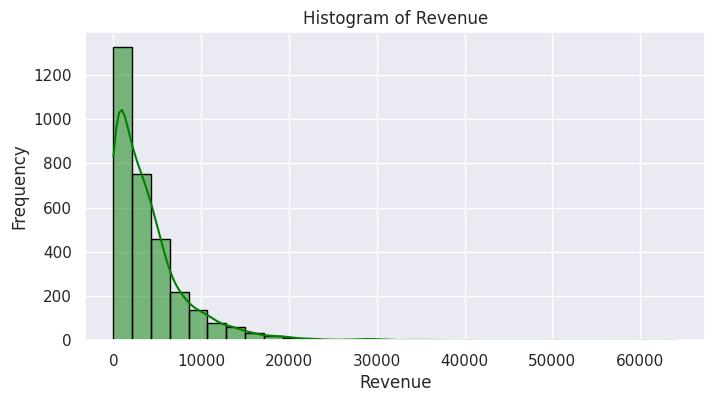

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=encoded_df, x="revenue", bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Histogram of Revenue')
plt.xlabel(f'Revenue')
plt.ylabel('Frequency')

In [ ]:
#due to 0 values, we do not want to apply log transformation
# first I will try min-max scalar (normalization) to force our values between 0 - 1
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
encoded_df['Rev_Norm'] = scaleMinMax.fit_transform(encoded_df[['revenue']])
encoded_df.head()
encoded_df.describe()

listing_price  sale_price  discount  revenue  rating  reviews  \
count        3117.00     3117.00   3117.00  3117.00 3117.00  3117.00   
mean           69.79       60.04      0.28  3947.13    3.27    41.55   
std            46.56       41.87      0.22  4435.50    1.39    31.37   
min             0.00        4.49      0.00     0.00    0.00     0.00   
25%            45.99       29.99      0.00   863.89    2.60    12.00   
50%            59.99       45.99      0.40  2735.28    3.50    39.00   
75%            89.99       77.99      0.50  5341.45    4.40    69.00   
max           299.99      365.00      0.60 64203.93    5.00   223.00   

       description_length_n  cushioning  comfort  running  ...    soft  \
count               3117.00     3117.00  3117.00  3117.00  ... 3117.00   
mean                 265.55        0.36     0.35     0.25  ...    0.15   
std                   74.77        0.48     0.48     0.43  ...    0.36   
min                   14.00        0.00     0.00     0.00  ...    0.00   
25%                  215.00        0.00     0.00     0.00  ...    0.00   
50%                  258.00        0.00     0.00     0.00  ...    0.00   
75%                  302.00        1.00     1.00     1.00  ...    0.00   
max                  687.00        1.00     1.00     1.00  ...    1.00   

       breathable  classic  modern  durable  stability   suede  polarity  \
count     3117.00  3117.00 3117.00  3117.00    3117.00 3117.00   3117.00   
mean         0.13     0.12    0.11     0.12       0.09    0.09      0.17   
std          0.33     0.32    0.31     0.33       0.28    0.28      0.15   
min          0.00     0.00    0.00     0.00       0.00    0.00     -0.46   
25%          0.00     0.00    0.00     0.00       0.00    0.00      0.07   
50%          0.00     0.00    0.00     0.00       0.00    0.00      0.17   
75%          0.00     0.00    0.00     0.00       0.00    0.00      0.25   
max          1.00     1.00    1.00     1.00       1.00    1.00      1.00   

       subjectivity  Rev_Norm  
count       3117.00   3117.00  
mean           0.40      0.06  
std            0.18      0.07  
min            0.00      0.00  
25%            0.28      0.01  
50%            0.40      0.04  
75%            0.51      0.08  
max            1.00      1.00  

[8 rows x 26 columns]

Text(0, 0.5, 'Frequency')

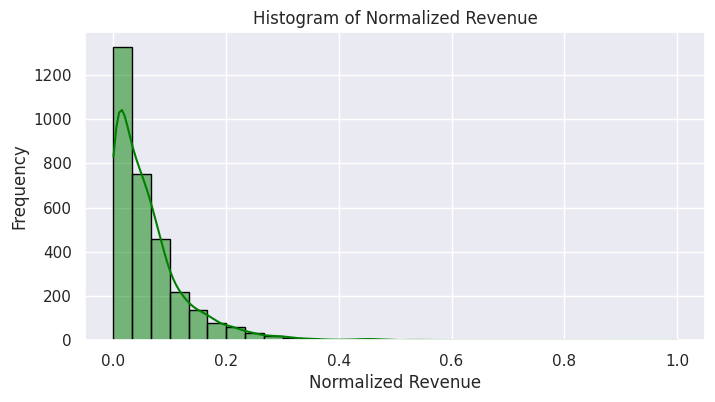

In [ ]:
# plot normalized values
plt.figure(figsize=(8, 4))
sns.histplot(data=encoded_df, x="Rev_Norm", bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Histogram of Normalized Revenue')
plt.xlabel(f'Normalized Revenue')
plt.ylabel('Frequency')

In [ ]:
# next I will try standardization
scaleStandard = StandardScaler()
encoded_df['Rev_Stand'] = scaleStandard.fit_transform(encoded_df[['revenue']])
encoded_df.head()
encoded_df.describe()

listing_price  sale_price  discount  revenue  rating  reviews  \
count        3117.00     3117.00   3117.00  3117.00 3117.00  3117.00   
mean           69.79       60.04      0.28  3947.13    3.27    41.55   
std            46.56       41.87      0.22  4435.50    1.39    31.37   
min             0.00        4.49      0.00     0.00    0.00     0.00   
25%            45.99       29.99      0.00   863.89    2.60    12.00   
50%            59.99       45.99      0.40  2735.28    3.50    39.00   
75%            89.99       77.99      0.50  5341.45    4.40    69.00   
max           299.99      365.00      0.60 64203.93    5.00   223.00   

       description_length_n  cushioning  comfort  running  ...  breathable  \
count               3117.00     3117.00  3117.00  3117.00  ...     3117.00   
mean                 265.55        0.36     0.35     0.25  ...        0.13   
std                   74.77        0.48     0.48     0.43  ...        0.33   
min                   14.00        0.00     0.00     0.00  ...        0.00   
25%                  215.00        0.00     0.00     0.00  ...        0.00   
50%                  258.00        0.00     0.00     0.00  ...        0.00   
75%                  302.00        1.00     1.00     1.00  ...        0.00   
max                  687.00        1.00     1.00     1.00  ...        1.00   

       classic  modern  durable  stability   suede  polarity  subjectivity  \
count  3117.00 3117.00  3117.00    3117.00 3117.00   3117.00       3117.00   
mean      0.12    0.11     0.12       0.09    0.09      0.17          0.40   
std       0.32    0.31     0.33       0.28    0.28      0.15          0.18   
min       0.00    0.00     0.00       0.00    0.00     -0.46          0.00   
25%       0.00    0.00     0.00       0.00    0.00      0.07          0.28   
50%       0.00    0.00     0.00       0.00    0.00      0.17          0.40   
75%       0.00    0.00     0.00       0.00    0.00      0.25          0.51   
max       1.00    1.00     1.00       1.00    1.00      1.00          1.00   

       Rev_Norm  Rev_Stand  
count   3117.00    3117.00  
mean       0.06       0.00  
std        0.07       1.00  
min        0.00      -0.89  
25%        0.01      -0.70  
50%        0.04      -0.27  
75%        0.08       0.31  
max        1.00      13.59  

[8 rows x 27 columns]

Text(0, 0.5, 'Frequency')

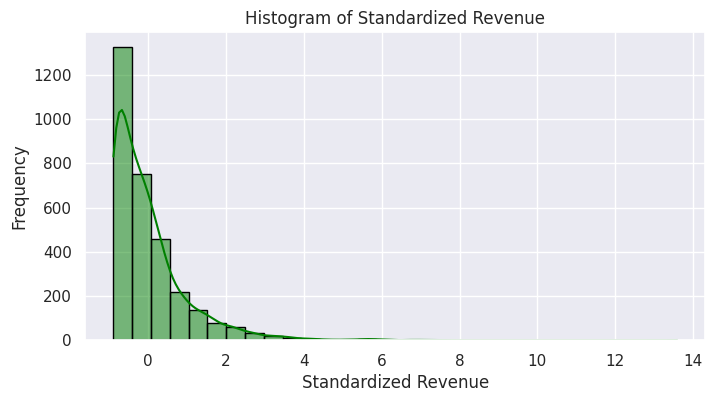

In [ ]:
# plot standardized values
plt.figure(figsize=(8, 4))
sns.histplot(data=encoded_df, x="Rev_Stand", bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Histogram of Standardized Revenue')
plt.xlabel(f'Standardized Revenue')
plt.ylabel('Frequency')

In [ ]:
# since neither was ideal, let us try the log transformation but add 1
log_transformed_data = np.log1p(encoded_df['revenue'])
encoded_df['Rev_Log'] = log_transformed_data
encoded_df.head()
encoded_df.describe()

listing_price  sale_price  discount  revenue  rating  reviews  \
count        3117.00     3117.00   3117.00  3117.00 3117.00  3117.00   
mean           69.79       60.04      0.28  3947.13    3.27    41.55   
std            46.56       41.87      0.22  4435.50    1.39    31.37   
min             0.00        4.49      0.00     0.00    0.00     0.00   
25%            45.99       29.99      0.00   863.89    2.60    12.00   
50%            59.99       45.99      0.40  2735.28    3.50    39.00   
75%            89.99       77.99      0.50  5341.45    4.40    69.00   
max           299.99      365.00      0.60 64203.93    5.00   223.00   

       description_length_n  cushioning  comfort  running  ...  classic  \
count               3117.00     3117.00  3117.00  3117.00  ...  3117.00   
mean                 265.55        0.36     0.35     0.25  ...     0.12   
std                   74.77        0.48     0.48     0.43  ...     0.32   
min                   14.00        0.00     0.00     0.00  ...     0.00   
25%                  215.00        0.00     0.00     0.00  ...     0.00   
50%                  258.00        0.00     0.00     0.00  ...     0.00   
75%                  302.00        1.00     1.00     1.00  ...     0.00   
max                  687.00        1.00     1.00     1.00  ...     1.00   

       modern  durable  stability   suede  polarity  subjectivity  Rev_Norm  \
count 3117.00  3117.00    3117.00 3117.00   3117.00       3117.00   3117.00   
mean     0.11     0.12       0.09    0.09      0.17          0.40      0.06   
std      0.31     0.33       0.28    0.28      0.15          0.18      0.07   
min      0.00     0.00       0.00    0.00     -0.46          0.00      0.00   
25%      0.00     0.00       0.00    0.00      0.07          0.28      0.01   
50%      0.00     0.00       0.00    0.00      0.17          0.40      0.04   
75%      0.00     0.00       0.00    0.00      0.25          0.51      0.08   
max      1.00     1.00       1.00    1.00      1.00          1.00      1.00   

       Rev_Stand  Rev_Log  
count    3117.00  3117.00  
mean        0.00     7.25  
std         1.00     2.29  
min        -0.89     0.00  
25%        -0.70     6.76  
50%        -0.27     7.91  
75%         0.31     8.58  
max        13.59    11.07  

[8 rows x 28 columns]

Text(0, 0.5, 'Frequency')

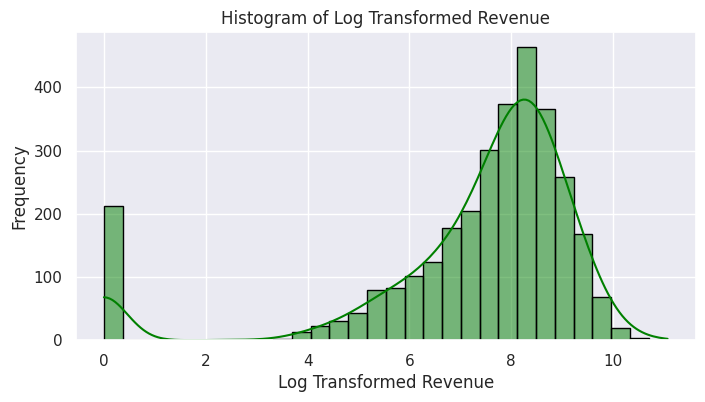

In [ ]:
# plot log transformed values - this transformation handles the values the best
plt.figure(figsize=(8, 4))
sns.histplot(data=encoded_df, x="Rev_Log", bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Histogram of Log Transformed Revenue')
plt.xlabel(f'Log Transformed Revenue')
plt.ylabel('Frequency')

DROP COLUMNS WE DO NOT WANT IN THE MODEL

In [ ]:
encoded_df.columns

Index(['product_id', 'listing_price', 'sale_price', 'discount', 'revenue',
       'product_name', 'description', 'rating', 'reviews',
       'description_length_n', 'description_length', 'cushioning', 'comfort',
       'running', 'mesh', 'lightweight', 'leather', 'EVA', 'Air',
       'comfortable', 'soft', 'breathable', 'classic', 'modern', 'durable',
       'stability', 'suede', 'polarity', 'subjectivity', 'brand_Nike',
       'price_label_Average', 'price_label_Expensive', 'price_label_Elite',
       'description_cat_201 - 300', 'description_cat_301 - 400',
       'description_cat_>= 401', 'Rev_Norm', 'Rev_Stand', 'Rev_Log'],
      dtype='object')

In [ ]:
print(encoded_df.shape)

(3117, 39)


NORMALIZATION / STANDARDIZAITON OF CONTINUOUS PREDICTORS

LIST: LISTING_PRICE, SALE_PRICE, DISCOUNT, RATING, REVIEWS, POLARITY

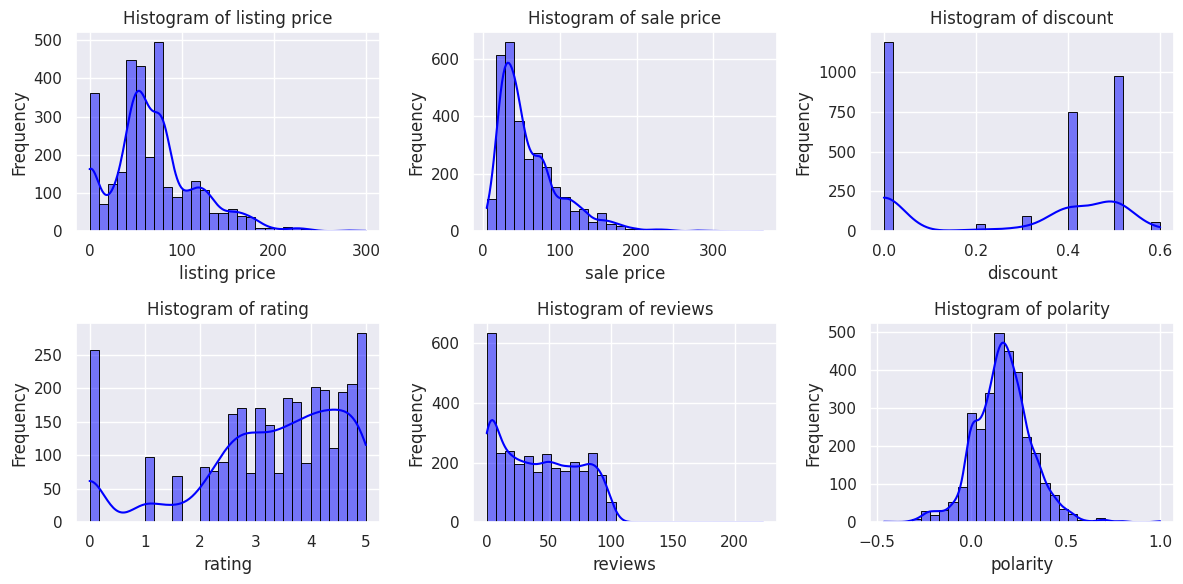

In [ ]:
#plots prior to normalization
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data=encoded_df, x='listing_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of listing price')
plt.xlabel(f'listing price')
plt.ylabel('Frequency')


plt.subplot(2, 3, 2)
sns.histplot(data=encoded_df, x='sale_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of sale price')
plt.xlabel(f'sale price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(data=encoded_df, x='discount', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of discount')
plt.xlabel(f'discount')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(data=encoded_df, x='rating', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of rating')
plt.xlabel(f'rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(data=encoded_df, x='reviews', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of reviews')
plt.xlabel(f'reviews')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(data=encoded_df, x='polarity', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of polarity')
plt.xlabel(f'polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

NORMALIZATION

In [ ]:
columns = ['listing_price', 'sale_price', 'discount', 'rating', 'reviews', 'polarity']
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
norm_df = scaleMinMax.fit_transform(encoded_df[columns])
norm_df = pd.DataFrame(norm_df, columns=columns)
norm_df.head()
norm_df.describe()

listing_price  sale_price  discount  rating  reviews  polarity
count        3117.00     3117.00   3117.00 3117.00  3117.00   3117.00
mean            0.23        0.15      0.46    0.65     0.19      0.43
std             0.16        0.12      0.37    0.28     0.14      0.10
min             0.00        0.00      0.00    0.00     0.00      0.00
25%             0.15        0.07      0.00    0.52     0.05      0.37
50%             0.20        0.12      0.67    0.70     0.17      0.43
75%             0.30        0.20      0.83    0.88     0.31      0.49
max             1.00        1.00      1.00    1.00     1.00      1.00

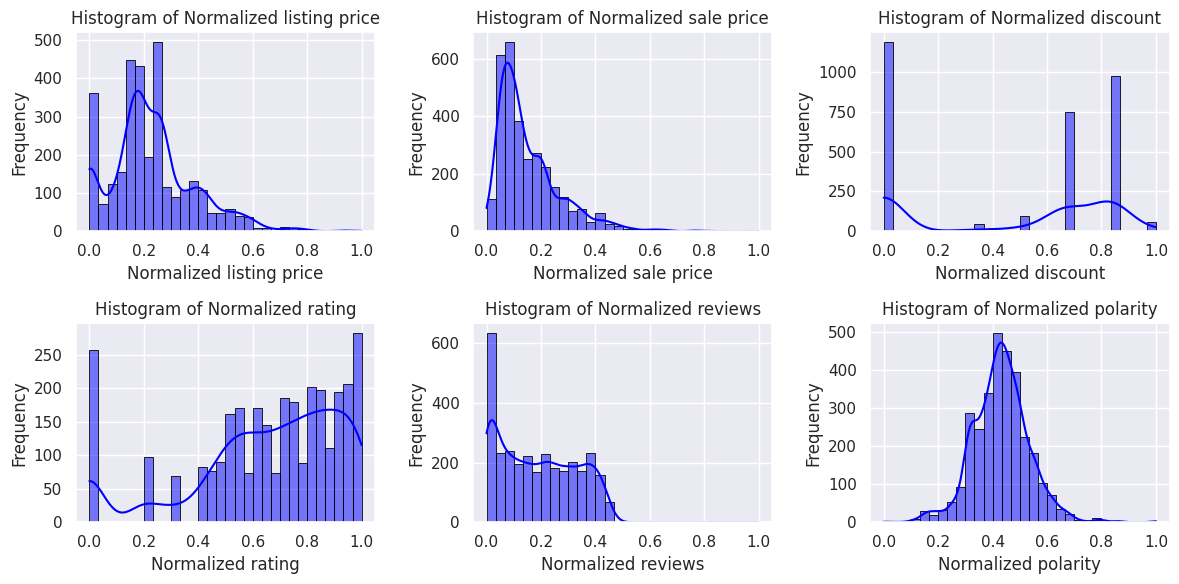

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data=norm_df, x='listing_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized listing price')
plt.xlabel(f'Normalized listing price')
plt.ylabel('Frequency')


plt.subplot(2, 3, 2)
sns.histplot(data=norm_df, x='sale_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized sale price')
plt.xlabel(f'Normalized sale price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(data=norm_df, x='discount', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized discount')
plt.xlabel(f'Normalized discount')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(data=norm_df, x='rating', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized rating')
plt.xlabel(f'Normalized rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(data=norm_df, x='reviews', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized reviews')
plt.xlabel(f'Normalized reviews')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(data=norm_df, x='polarity', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Normalized polarity')
plt.xlabel(f'Normalized polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = ['listing_price', 'sale_price', 'discount', 'rating', 'reviews', 'polarity']
scaleStandard = StandardScaler()
stand_df = scaleStandard.fit_transform(encoded_df[columns])
stand_df = pd.DataFrame(stand_df, columns=columns)
print(stand_df.head())
print(stand_df.describe())

   listing_price  sale_price  discount  rating  reviews  polarity
0           0.13       -0.53      0.99    0.03    -0.56      0.44
1          -1.28       -1.29      0.55   -0.48    -0.15      2.35
2           0.00       -0.60      0.99    0.60    -0.21     -0.55
3           0.22       -0.48      0.99    0.17     0.97      0.91
4          -0.47       -0.98      1.44   -1.63     0.11     -0.77
       listing_price  sale_price  discount  rating  reviews  polarity
count        3117.00     3117.00   3117.00 3117.00  3117.00   3117.00
mean           -0.00       -0.00      0.00    0.00     0.00     -0.00
std             1.00        1.00      1.00    1.00     1.00      1.00
min            -1.50       -1.33     -1.23   -2.34    -1.32     -4.15
25%            -0.51       -0.72     -1.23   -0.48    -0.94     -0.60
50%            -0.21       -0.34      0.55    0.17    -0.08     -0.00
75%             0.43        0.43      0.99    0.81     0.88      0.55
max             4.95        7.28      1.44  

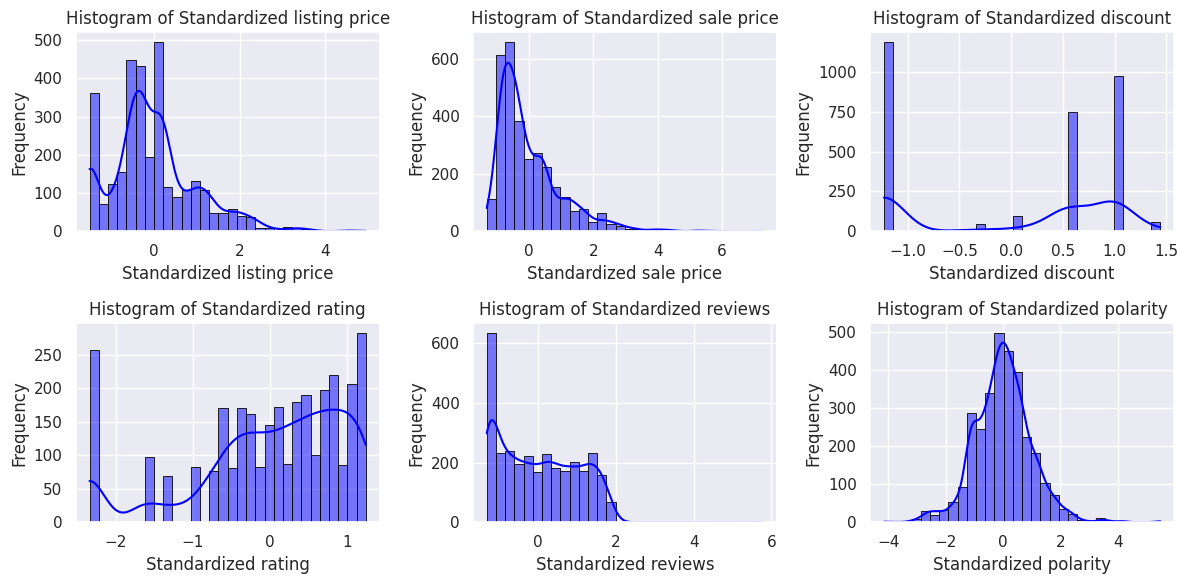

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(data=stand_df, x='listing_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized listing price')
plt.xlabel(f'Standardized listing price')
plt.ylabel('Frequency')


plt.subplot(2, 3, 2)
sns.histplot(data=stand_df, x='sale_price', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized sale price')
plt.xlabel(f'Standardized sale price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
sns.histplot(data=stand_df, x='discount', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized discount')
plt.xlabel(f'Standardized discount')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
sns.histplot(data=stand_df, x='rating', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized rating')
plt.xlabel(f'Standardized rating')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
sns.histplot(data=stand_df, x='reviews', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized reviews')
plt.xlabel(f'Standardized reviews')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.histplot(data=stand_df, x='polarity', bins=30, kde=True, color='blue', edgecolor='black')
plt.title(f'Histogram of Standardized polarity')
plt.xlabel(f'Standardized polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

DUE TO NO BIG DIFFERENCES OBSERVED, I CHOSE NORMALIZATION linke here (https://www.geeksforgeeks.org/what-is-data-normalization/) states to use normalization when data is not normally distributed

In [ ]:
columns = ['listing_price', 'sale_price', 'discount', 'rating', 'reviews', 'polarity']
scaleMinMax = MinMaxScaler(feature_range=(0, 1))
norm_df = scaleMinMax.fit_transform(encoded_df[columns])
norm_df = pd.DataFrame(norm_df, columns=columns)
norm_df.head()
norm_df.describe()

listing_price  sale_price  discount  rating  reviews  polarity
count        3117.00     3117.00   3117.00 3117.00  3117.00   3117.00
mean            0.23        0.15      0.46    0.65     0.19      0.43
std             0.16        0.12      0.37    0.28     0.14      0.10
min             0.00        0.00      0.00    0.00     0.00      0.00
25%             0.15        0.07      0.00    0.52     0.05      0.37
50%             0.20        0.12      0.67    0.70     0.17      0.43
75%             0.30        0.20      0.83    0.88     0.31      0.49
max             1.00        1.00      1.00    1.00     1.00      1.00

In [ ]:
print(norm_df.shape)

(3117, 6)


In [ ]:
print(norm_df.isna().sum())

listing_price    0
sale_price       0
discount         0
rating           0
reviews          0
polarity         0
dtype: int64


In [ ]:
print(encoded_df[columns].max() - encoded_df[columns].min())  # Check the range (max - min) for each column

listing_price   299.99
sale_price      360.51
discount          0.60
rating            5.00
reviews         223.00
polarity          1.46
dtype: float64


In [ ]:
print(encoded_df[columns].dtypes)

listing_price    float64
sale_price       float64
discount         float64
rating           float64
reviews          float64
polarity         float64
dtype: object


In [ ]:
print((encoded_df[columns] == float('inf')).sum())  # Check for infinite values
print((encoded_df[columns] == -float('inf')).sum())  # Check for negative infinite values

listing_price    0
sale_price       0
discount         0
rating           0
reviews          0
polarity         0
dtype: int64
listing_price    0
sale_price       0
discount         0
rating           0
reviews          0
polarity         0
dtype: int64


In [ ]:
scaleMinMax = MinMaxScaler(feature_range=(0, 1))

# Apply MinMaxScaler to the selected columns and handle any errors
try:
    norm_df = scaleMinMax.fit_transform(encoded_df[columns])
except Exception as e:
    print(f"Error during transformation: {e}")
    #no errors observed

In [ ]:
encoded_df = encoded_df.reset_index(drop=True)
columns = ['listing_price', 'sale_price', 'discount', 'rating', 'reviews', 'polarity']
norm_df = pd.DataFrame(norm_df, columns=columns)

# Add the normalized columns to the original dataframe
for column in columns:
    encoded_df[f'normalized_{column}'] = norm_df[column]

print(encoded_df.head())
print(encoded_df.describe())

  product_id  listing_price  sale_price  discount  revenue  \
0     G27341          75.99       37.99      0.50  1641.17   
1     CM0081           9.99        5.99      0.40   398.93   
2     B44832          69.99       34.99      0.50  2204.37   
3     D98205          79.99       39.99      0.50  5182.70   
4     B75586          47.99       19.20      0.60  1555.20   

                                        product_name  \
0               Women's adidas Originals Sleek Shoes   
1                  Women's adidas Swim Puka Slippers   
2   Women's adidas Sport Inspired Questar Ride Shoes   
3           Women's adidas Originals Taekwondo Shoes   
4  Women's adidas Sport Inspired Duramo Lite 2.0 ...   

                                         description  rating  reviews  \
0  A modern take on adidas sport heritage, tailor...    3.30    24.00   
1  These adidas Puka slippers for women's come wi...    2.60    37.00   
2  Inspired by modern tech runners, these women's...    4.10    35.00  

DROP UN-NORMALIZED COLUMNS

In [ ]:
encoded_df_ = encoded_df.drop(columns = ['product_id', 'revenue', 'product_name', 'description', 'description_length_n', 'description_length', 'subjectivity', 'listing_price','sale_price','discount','rating','reviews','polarity', 'Rev_Stand', 'Rev_Norm'])
print(encoded_df_.dtypes)

cushioning                     int64
comfort                        int64
running                        int64
mesh                           int64
lightweight                    int64
leather                        int64
EVA                            int64
Air                            int64
comfortable                    int64
soft                           int64
breathable                     int64
classic                        int64
modern                         int64
durable                        int64
stability                      int64
suede                          int64
brand_Nike                      bool
price_label_Average             bool
price_label_Expensive           bool
price_label_Elite               bool
description_cat_201 - 300       bool
description_cat_301 - 400       bool
description_cat_>= 401          bool
Rev_Log                      float64
normalized_listing_price     float64
normalized_sale_price        float64
normalized_discount          float64
n

In [ ]:
print(encoded_df_.shape)

(3117, 30)


In [ ]:
# dropping 'ID' and the target variable and target from the data
X = encoded_df_.drop(columns=['Rev_Log'])
y = encoded_df_['Rev_Log'].values

In [ ]:
print(X.dtypes)

cushioning                     int64
comfort                        int64
running                        int64
mesh                           int64
lightweight                    int64
leather                        int64
EVA                            int64
Air                            int64
comfortable                    int64
soft                           int64
breathable                     int64
classic                        int64
modern                         int64
durable                        int64
stability                      int64
suede                          int64
brand_Nike                      bool
price_label_Average             bool
price_label_Expensive           bool
price_label_Elite               bool
description_cat_201 - 300       bool
description_cat_301 - 400       bool
description_cat_>= 401          bool
normalized_listing_price     float64
normalized_sale_price        float64
normalized_discount          float64
normalized_rating            float64
n

### TRAIN-TEST SPLIT

In [ ]:
print(X.isna().sum())

cushioning                   0
comfort                      0
running                      0
mesh                         0
lightweight                  0
leather                      0
EVA                          0
Air                          0
comfortable                  0
soft                         0
breathable                   0
classic                      0
modern                       0
durable                      0
stability                    0
suede                        0
brand_Nike                   0
price_label_Average          0
price_label_Expensive        0
price_label_Elite            0
description_cat_201 - 300    0
description_cat_301 - 400    0
description_cat_>= 401       0
normalized_listing_price     0
normalized_sale_price        0
normalized_discount          0
normalized_rating            0
normalized_reviews           0
normalized_polarity          0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.25, shuffle=True)

print("\nShapes after splitting:")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Shapes after splitting:
Training set: (2337, 29)
Test set: (780, 29)


### LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# expose the model to new values and predict the target vector
y_predictions = model.predict(X_test)
# get the coefficients and intercept
print("Coefficients:\n", model.coef_)
print('Intercept:\n', model.intercept_)

Coefficients:
 [-1.67108708e-02 -7.29861277e-02  8.79114538e-02 -1.25230836e-01
  1.25996823e-02  1.05162768e-01 -7.42395525e-02  1.86584114e-01
 -1.01483236e-01 -1.31174066e-01  2.32032754e-01 -1.02850602e-03
  4.46841316e-02  8.17450718e-03  9.18452879e-02  3.06384507e-02
 -2.20852323e+00  1.68194861e-01  5.13647071e-01  6.48394588e-01
  8.91529957e-02  3.83871535e-03  2.86186284e-02  3.71309125e-01
  2.59045931e+00 -4.28731926e-01  2.78844427e+00  8.10695583e+00
  8.20259186e-02]
Intercept:
 3.621410524385502


In [ ]:
mse = mean_squared_error(y_test, y_predictions)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 1.610295403793274
Model Coefficients: [-1.67108708e-02 -7.29861277e-02  8.79114538e-02 -1.25230836e-01
  1.25996823e-02  1.05162768e-01 -7.42395525e-02  1.86584114e-01
 -1.01483236e-01 -1.31174066e-01  2.32032754e-01 -1.02850602e-03
  4.46841316e-02  8.17450718e-03  9.18452879e-02  3.06384507e-02
 -2.20852323e+00  1.68194861e-01  5.13647071e-01  6.48394588e-01
  8.91529957e-02  3.83871535e-03  2.86186284e-02  3.71309125e-01
  2.59045931e+00 -4.28731926e-01  2.78844427e+00  8.10695583e+00
  8.20259186e-02]
Model Intercept: 3.621410524385502


In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_predictions)
print("Mean Absolute Error:", MAE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_predictions)
print("Mean Squared Error:", MSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predictions)
print("R-squared:", r2)
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(y_test, y_predictions)
print("Root Mean Squared Error:", RMSE)

Mean Absolute Error: 0.9103175855971068
Mean Squared Error: 1.610295403793274
R-squared: 0.6787019572747384
Root Mean Squared Error: 1.268974154107669


In [ ]:
# Calculate residuals
residuals_test = y_test - y_predictions

# Calculate the standard deviation of the residuals
residuals_std_test = np.std(residuals_test)

# Standardize the residuals
standardized_residuals_test = residuals_test / residuals_std_test

# Print the standardized residuals
print(standardized_residuals_test)

[-4.49223253e-01  2.09332413e-01  2.07667056e-01  1.90993945e+00
  1.89825683e-01 -3.42283017e-01  1.24955102e-01  5.12576516e-02
  2.26284335e-01 -1.89789259e+00 -3.42426810e-01  5.45045964e-01
 -6.47320168e-01  2.24251237e-01 -5.40261344e-01 -7.19226098e-02
  7.55985059e-02 -4.38262811e-01 -3.56503592e-01  7.37260352e-01
 -1.10802323e+00  3.99321560e-01 -1.64853556e-01 -1.25882320e-01
  9.78339995e-01  2.99632209e-01  8.85242556e-02 -5.73860058e+00
  7.71750721e-01  3.53177475e-01 -6.54605908e-01 -1.45905500e+00
 -6.98110522e-01  1.70979874e+00 -3.36841889e-02  5.94356077e-01
  1.66395061e+00 -7.56815147e-01 -7.31016703e-02  4.68620278e-01
 -1.22508539e+00  4.30598048e-01  1.22155288e-01  1.31415114e+00
  5.49346419e-01  1.48834632e+00  3.83900772e-01  1.26273697e+00
  1.93122810e-02 -1.43337561e-01  1.24456300e+00 -3.81350403e-01
  3.21044373e-01 -3.75338291e-01 -2.63279384e-01  1.37813427e-01
  1.05090128e-01  2.32982743e-01 -3.63311430e-02 -2.04702624e+00
 -7.47365659e-01  7.66628

In [ ]:
# Calculate residuals
y_predictions_train = model.predict(X_train)
residuals_train = y_train - y_predictions_train

# Calculate the standard deviation of the residuals
residuals_std_train = np.std(residuals_train)

# Standardize the residuals
standardized_residuals_train = residuals_train / residuals_std_train

# Print the standardized residuals
print(standardized_residuals_train)

[-2.01687526 -0.40065752 -0.67801261 ... -0.68092142  0.14194139
 -0.12253821]


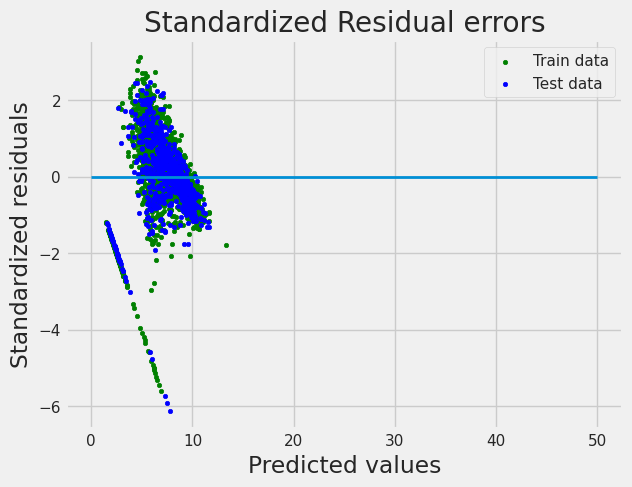

In [ ]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(y_predictions_train,
            standardized_residuals_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(y_predictions,
            standardized_residuals_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Standardized Residual errors")
plt.xlabel("Predicted values")
plt.ylabel("Standardized residuals")

# method call for showing the plot
plt.show()

Text(0, 0.5, 'Predictions')

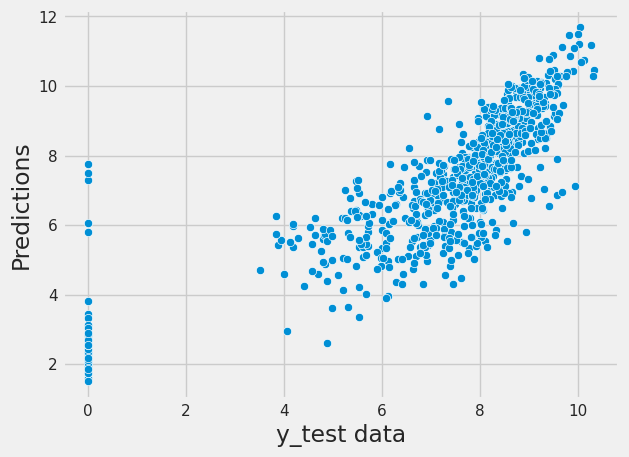

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_predictions)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predictions)
print(r2)

0.6787019572747384


In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


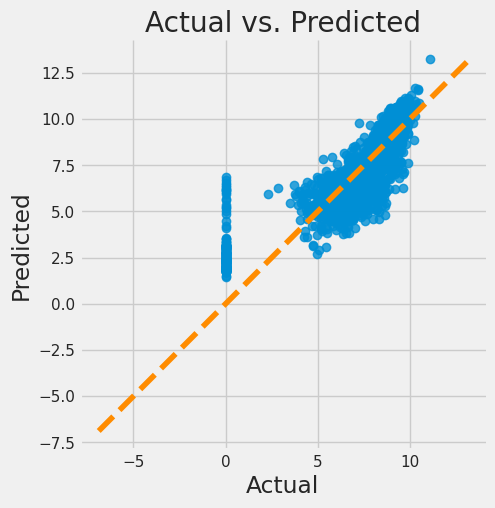

In [ ]:
linear_assumption(model, X_train, y_train)

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


<ipython-input-497-460b2c0160e3>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


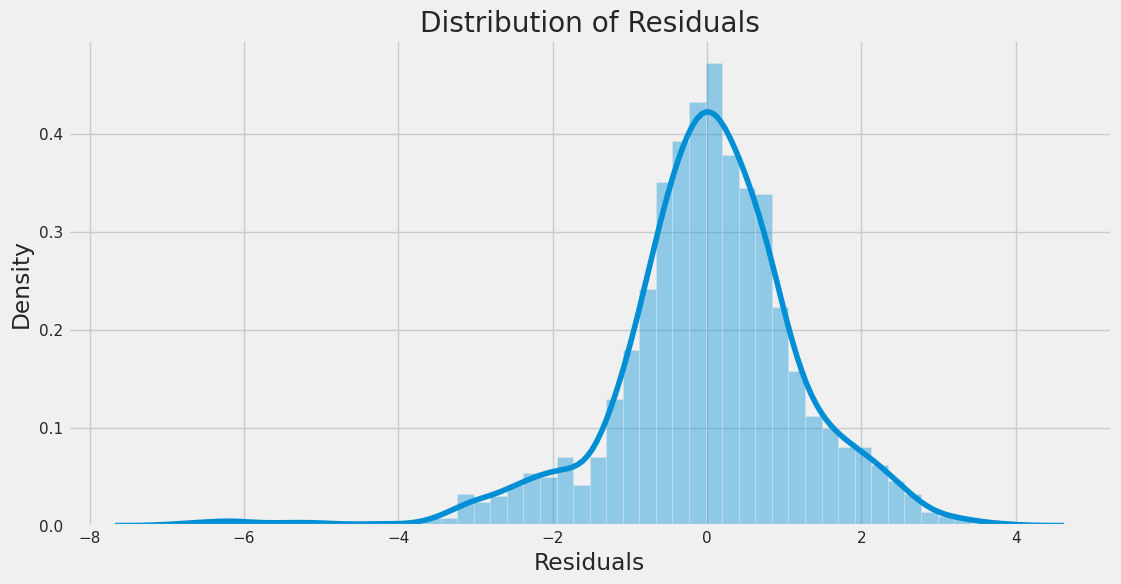


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [ ]:
normal_errors_assumption(model, X_train, y_train)

In [ ]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')

    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [ ]:
autocorrelation_assumption(model, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9985863687219911
Little to no autocorrelation 

Assumption satisfied


### REGRESSION TREE MODEL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
model_tree = DecisionTreeRegressor(random_state=12345)
model_tree.fit(X_train, y_train)
predictions = model_tree.predict(X_test)

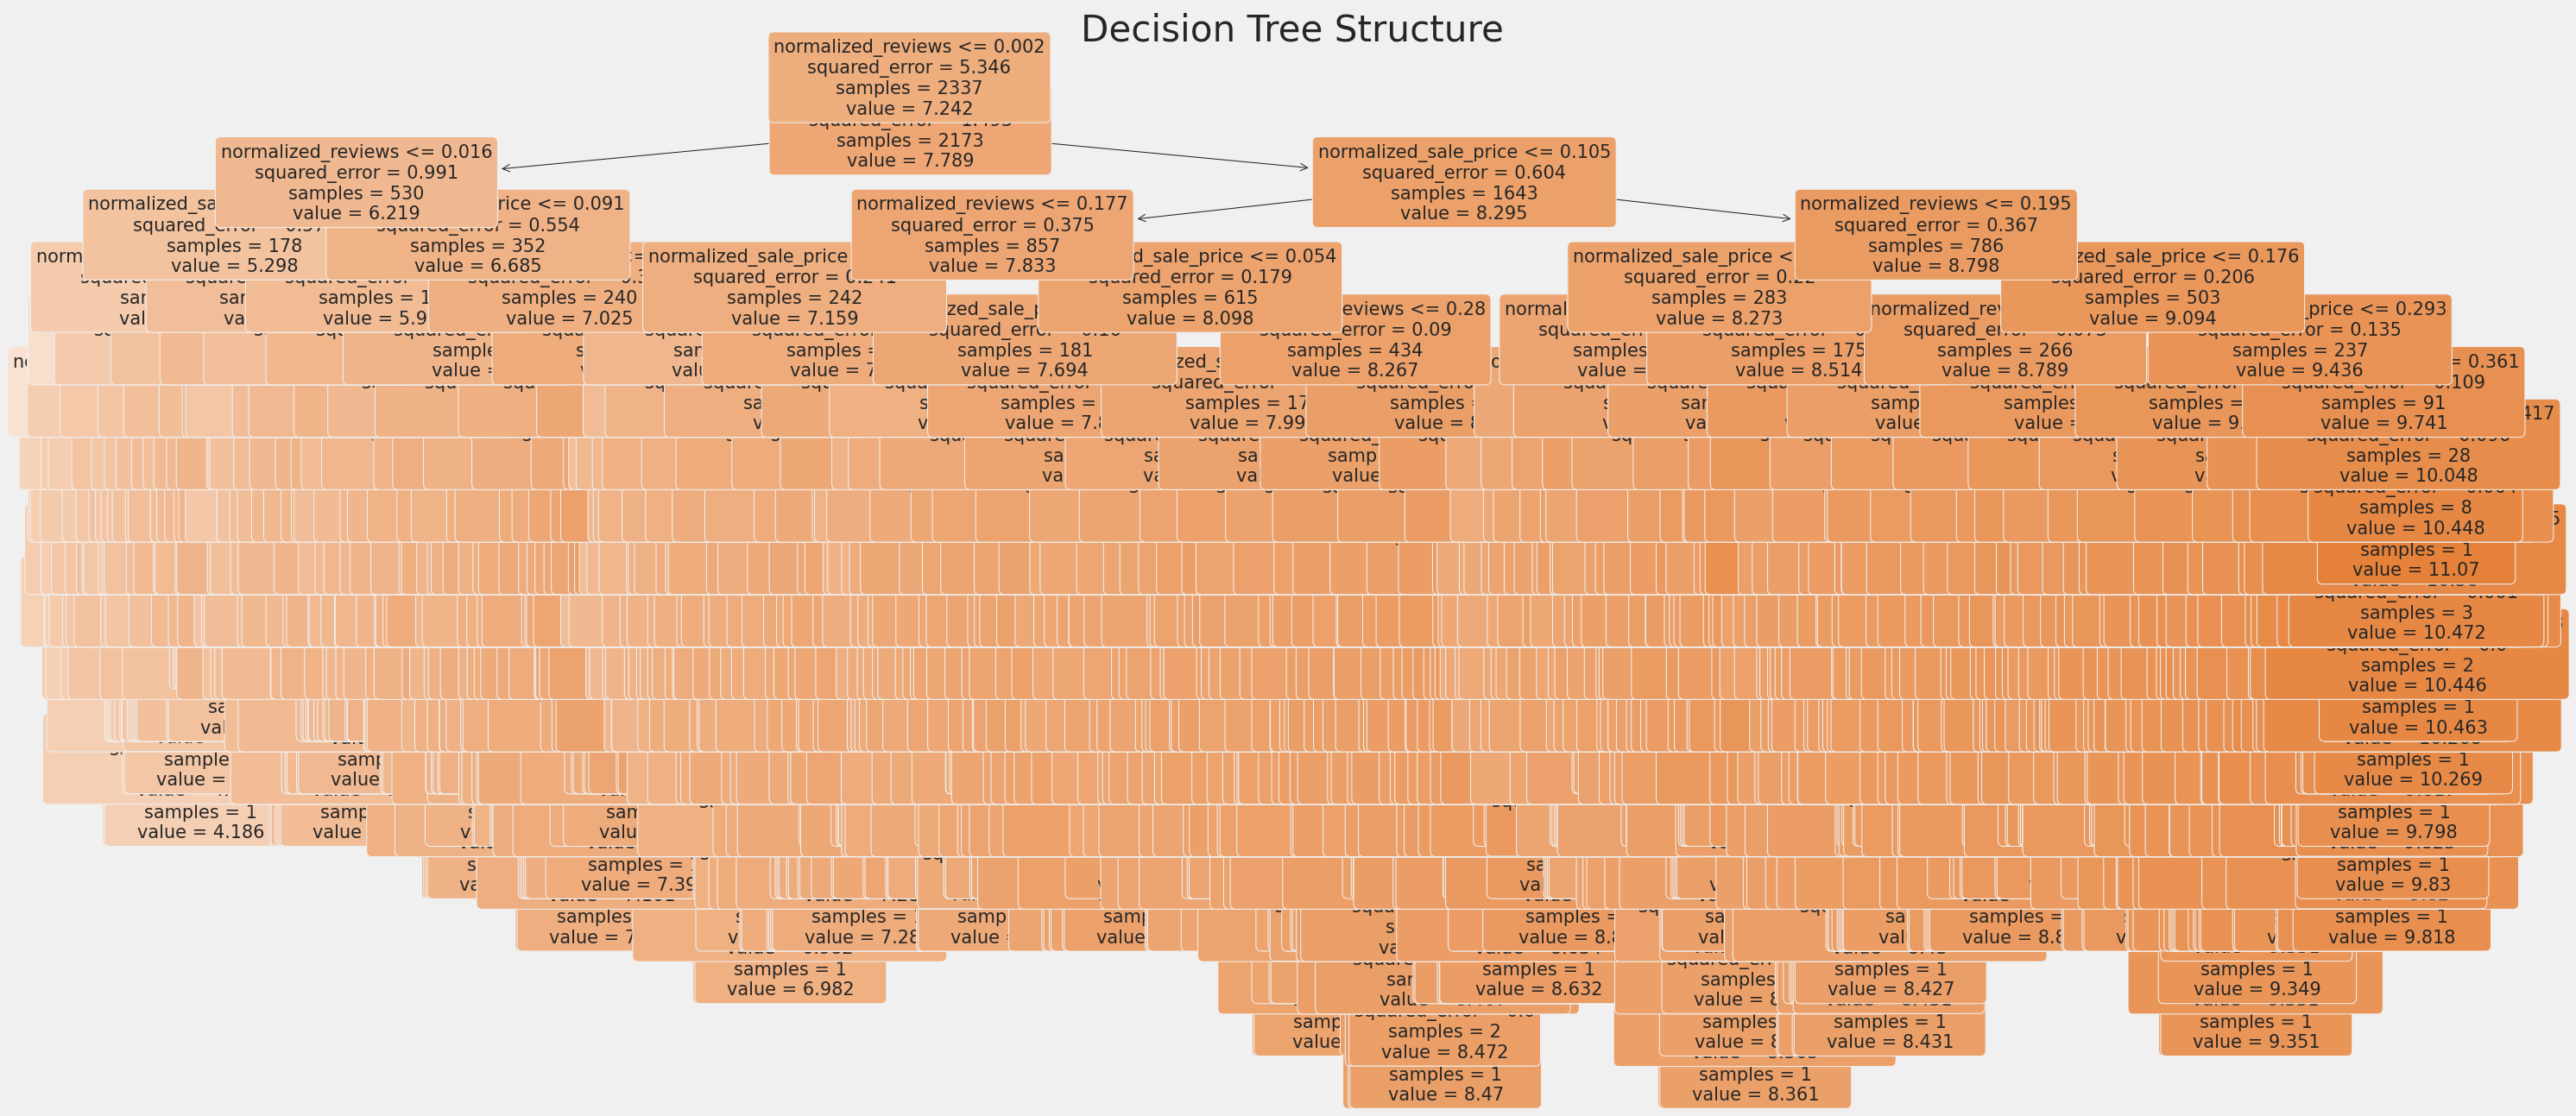

In [ ]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(
    model_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
# Model Accuracy before pruning
accuracy_before_pruning = model_tree.score(X_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)


Accuracy before pruning: 0.9981674631113323


In [ ]:
# Cost-complexity pruning (Post-pruning)
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeRegressor(criterion="squared_error", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.9983461534276723


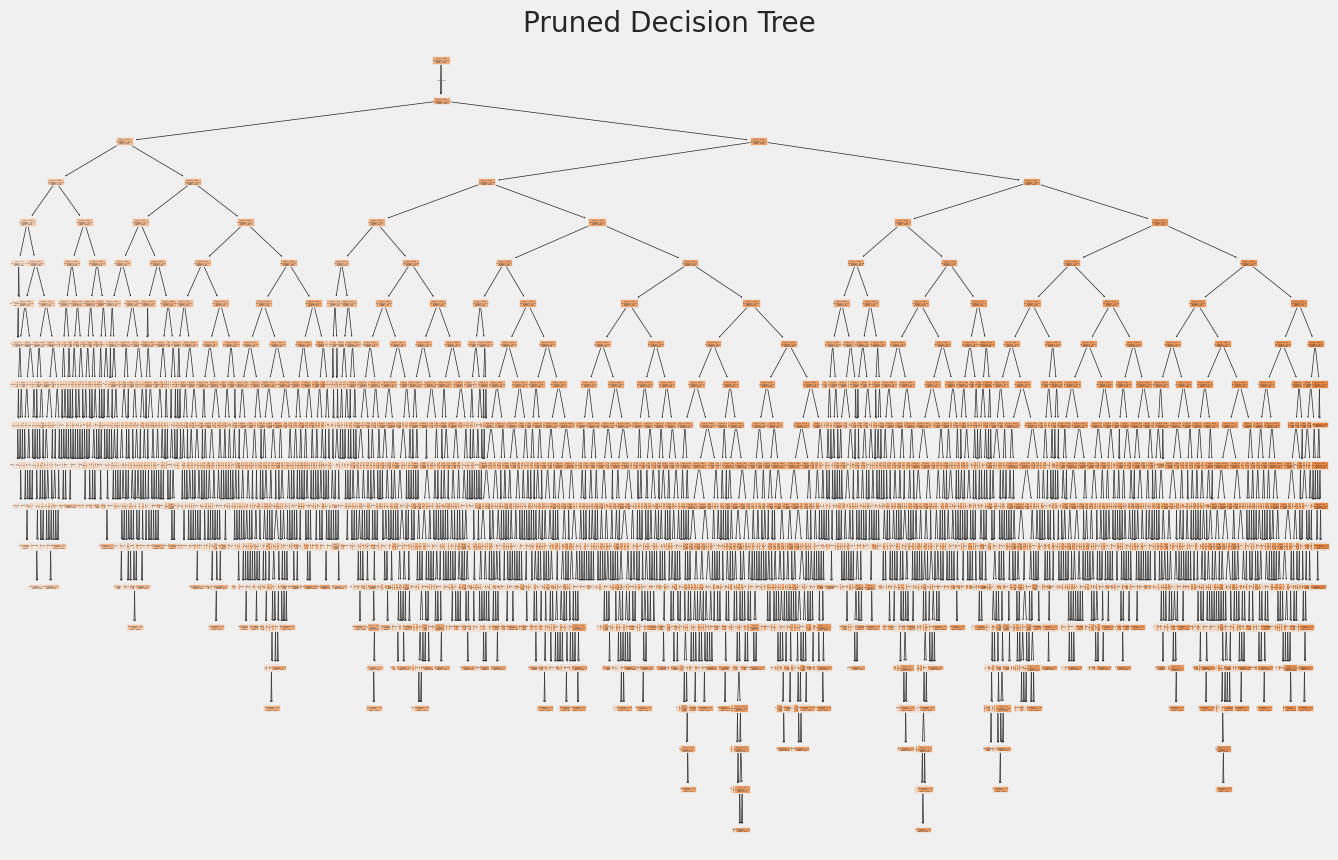

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(best_pruned_model, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# MANUAL PRUNING --- THIS IS THE FINAL MODEL USED IN PAPER FOR PREDICTION OF REVENUE

In [ ]:
model_tree_prune = DecisionTreeRegressor(random_state=12345, criterion='squared_error', splitter='best', max_depth=5, min_samples_split=20, min_samples_leaf=20,
                                  max_features=None)
model_tree_prune.fit(X_train, y_train)
predictions_prune = model_tree_prune.predict(X_test)

In [ ]:
accuracy_after_pruning = model_tree_prune.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.9717914875421703


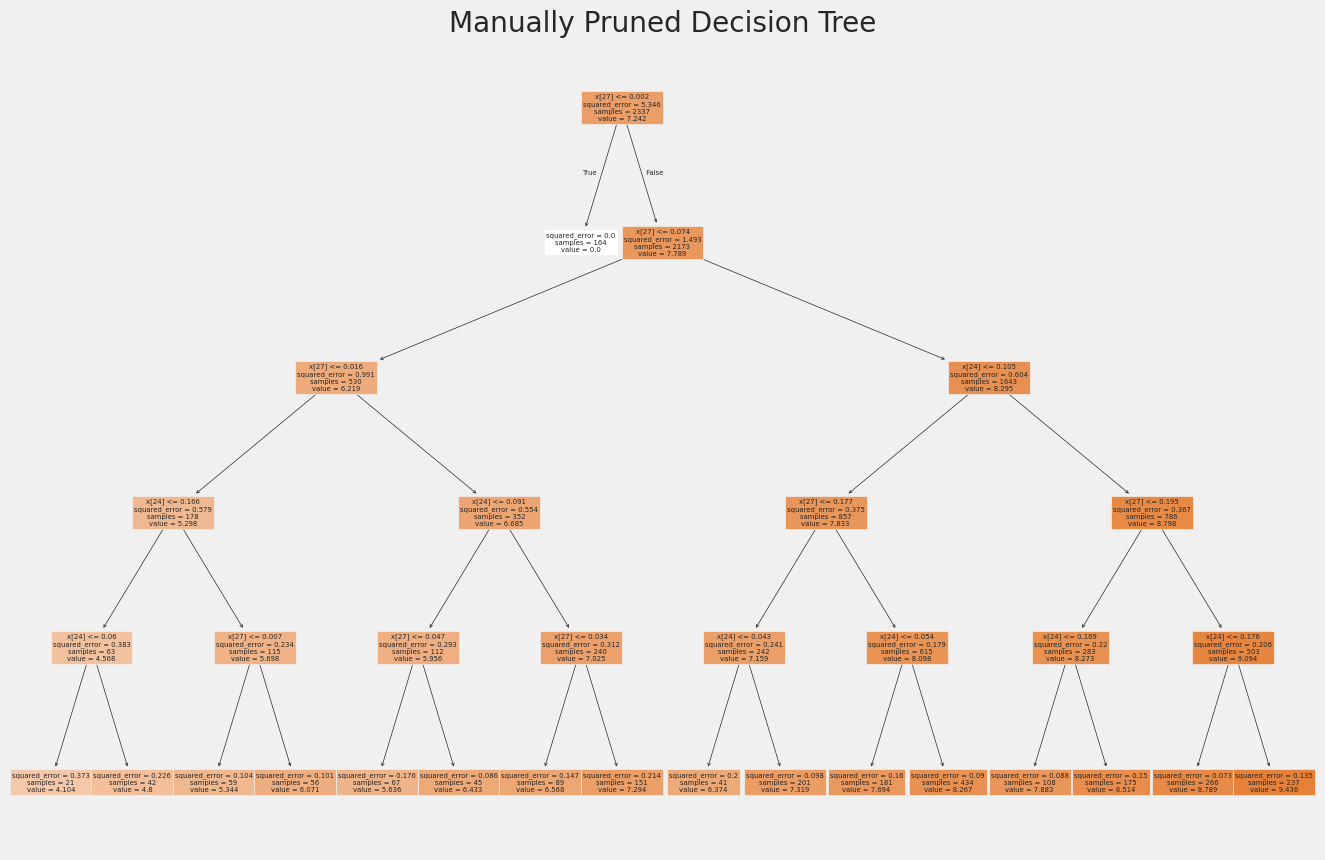

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(model_tree_prune, filled=True)
plt.title("Manually Pruned Decision Tree")
plt.show()

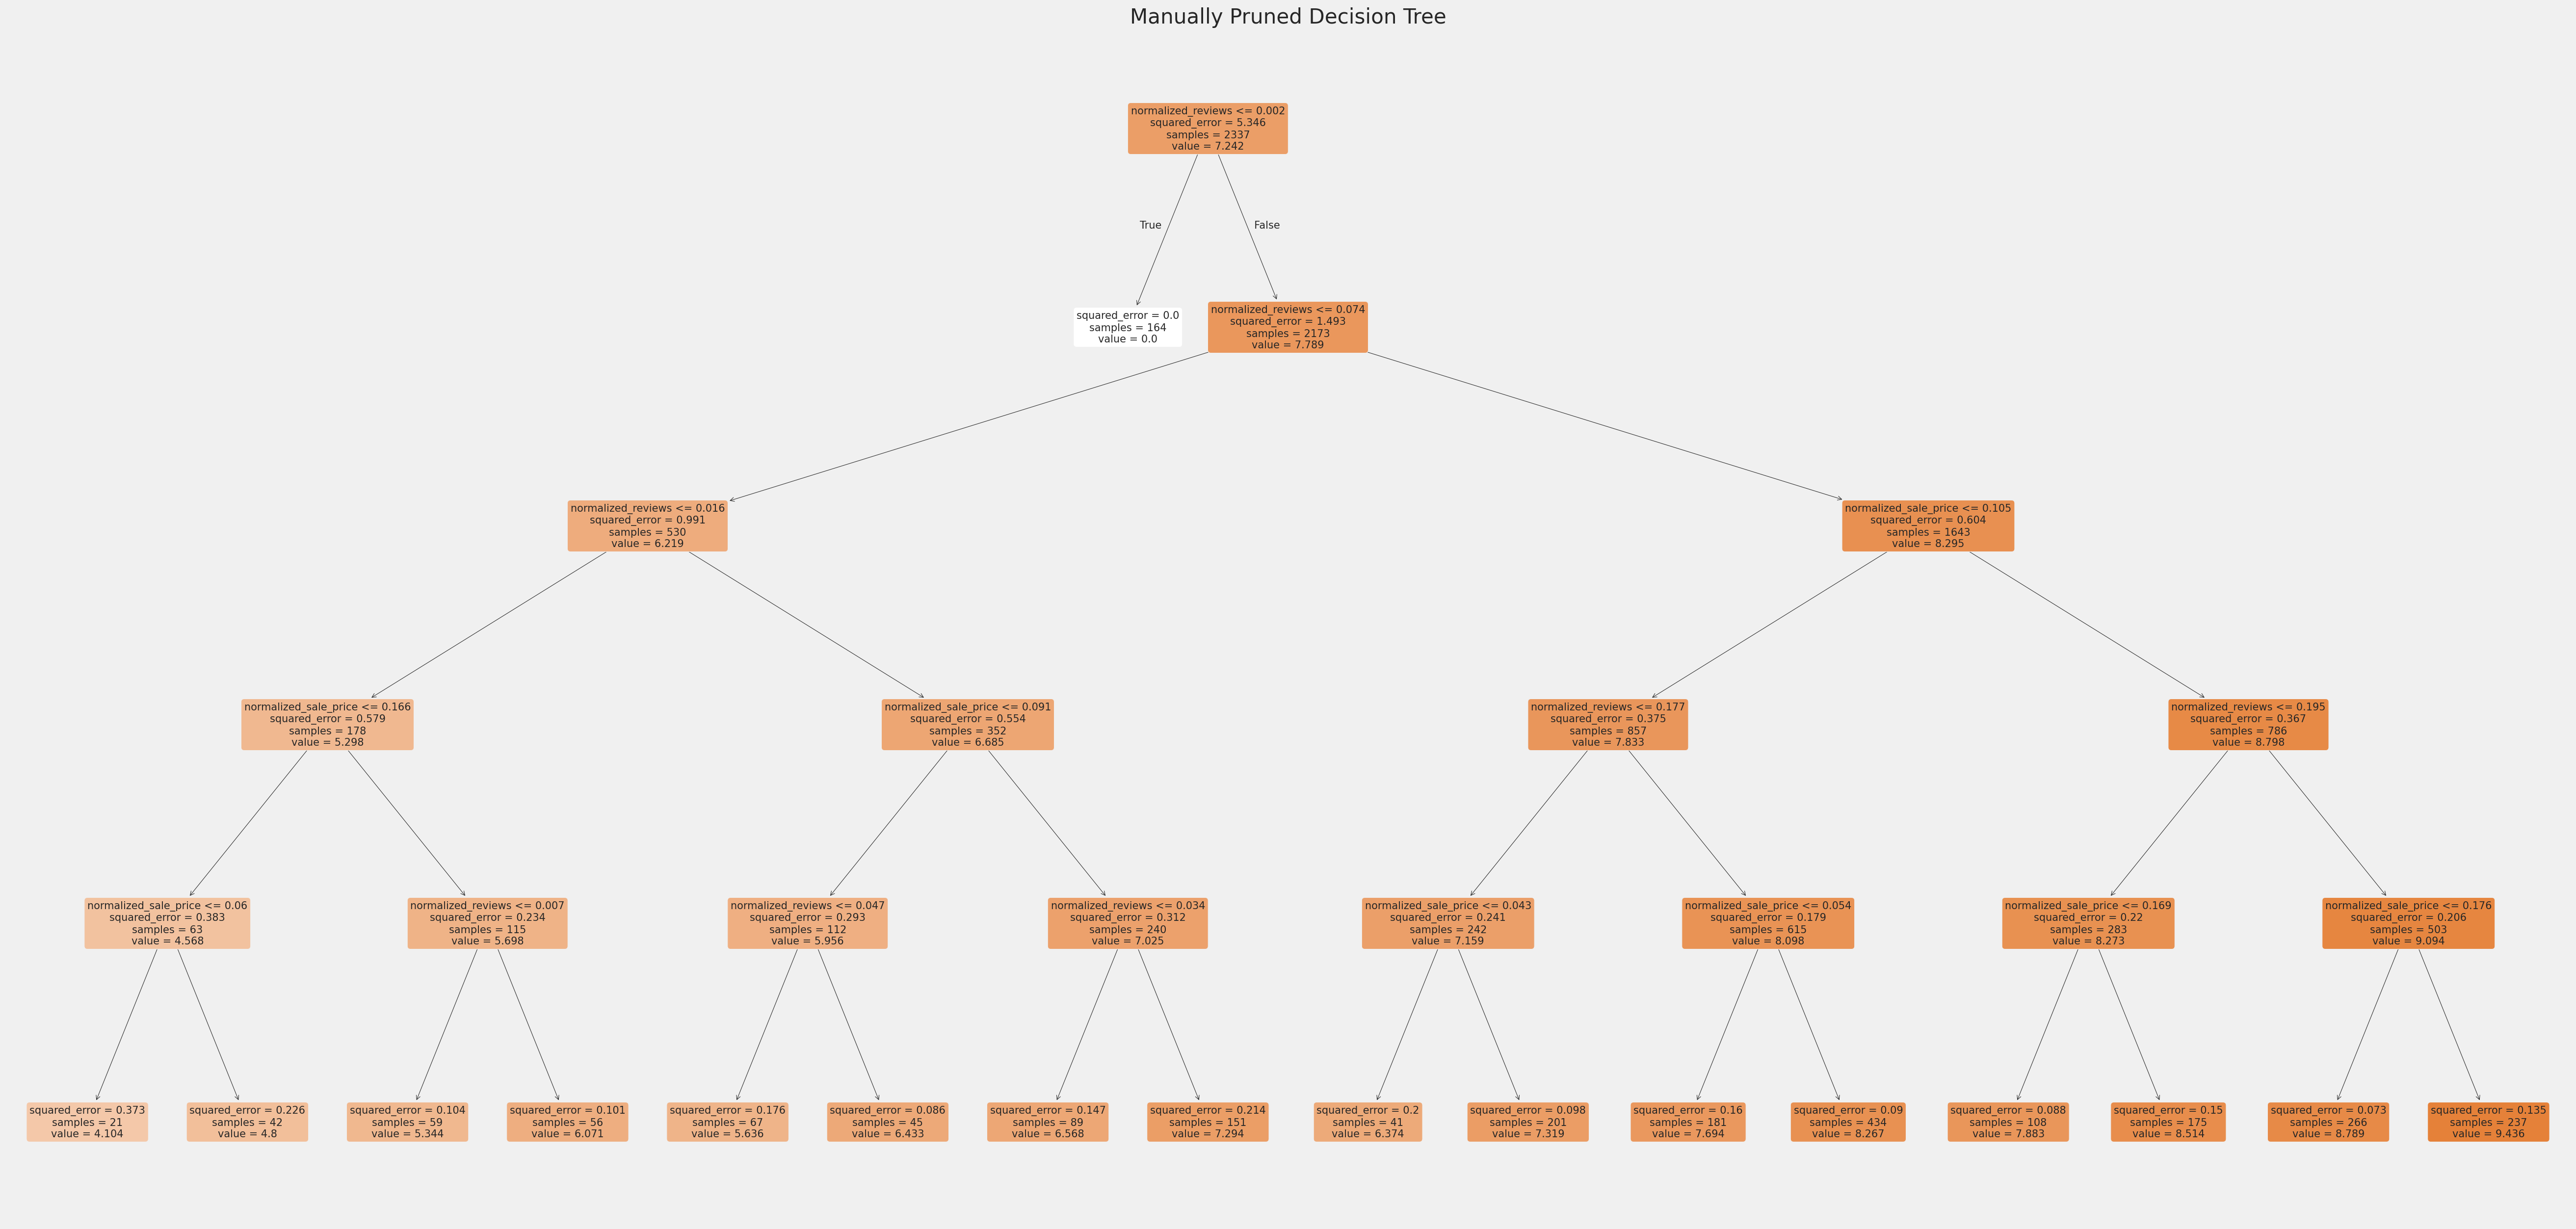

In [ ]:
from sklearn.tree import plot_tree

# Visualizing decision tree
plt.figure(figsize=(40, 20), dpi=150)
plot_tree(
    model_tree_prune,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Manually Pruned Decision Tree")
plt.show()

In [ ]:
!pip install graphviz
!pip install dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model_tree_prune, X, y,
                target_name="Rev_Log",
                feature_names=X.columns.tolist())
viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/usr/local/lib/python3.11/dist-packages/dtreeviz/trees.py)

In [ ]:
#!pip install supertree
from supertree import SuperTree

super_tree = SuperTree(model_tree_prune, X, y, X.columns.tolist())

# show tree in your notebook
super_tree.show_tree()

METRICS FOR TREE

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, predictions_prune)
print("Mean Absolute Error:", MAE)
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, predictions_prune)
print("Mean Squared Error:", MSE)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_prune)
print("R-squared:", r2)
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(y_test, predictions_prune)
print("Root Mean Squared Error:", RMSE)

Mean Absolute Error: 0.2911942393523141
Mean Squared Error: 0.14137664074577055
R-squared: 0.9717914875421703
Root Mean Squared Error: 0.3760008520545805


########## METRICS FOR LINEAR REGRESSION

Mean Absolute Error: 0.9103175855971068

Mean Squared Error: 1.610295403793274

R-squared: 0.6787019572747384

Root Mean Squared Error: 1.268974154107669

DECISION TREE HAD BETTER MODEL FIT (LOWER MAE, MSE, AND RMSE) AND BETTER PREDICTION/ACCURACY (R-SQUARED) SO I WILL USE THIS

EXPORT DATASETS FOR EASY IMPORT

In [ ]:
encoded_df.to_csv('encoded_df.csv', index=False)

DESCRIPTIVE CORRELATION BETWEEN REVENUE AND REVIEWS, SALE PRICE (BUSINESS UNDERSTANDING OUT OF UNNORMALIZED REVIEWS, SALE PRICE, LOG TRANSFORMED REVENUE)

In [ ]:
print(encoded_df['revenue'].agg(['min','median', 'mean', 'std', 'max']))
print(encoded_df['revenue'].quantile([0.25, 0.75]))

min          0.00
median    2735.28
mean      3947.13
std       4435.50
max      64203.93
Name: revenue, dtype: float64
0.25    863.89
0.75   5341.45
Name: revenue, dtype: float64


In [ ]:
bins = [0.00, 863.89, 2735.28, 5341.45, np.inf]
group = ['0 - 863', '864 - 2735', '2736 - 5341', '> 5341']
encoded_df['revenue_cat'] = pd.cut(encoded_df['revenue'], bins=bins, labels=group, include_lowest=True)
Revenue_cat = encoded_df.groupby("revenue_cat")[["revenue"]].agg(["min", "max"])
print(Revenue_cat)
print(encoded_df.stb.freq(['revenue_cat']))

            revenue         
                min      max
revenue_cat                 
0 - 863        0.00   863.89
864 - 2735   865.13  2735.28
2736 - 5341 2735.66  5341.45
> 5341      5345.01 64203.93
   revenue_cat  count  percent  cumulative_count  cumulative_percent
0      0 - 863    782    25.09               782               25.09
1       > 5341    779    24.99              1561               50.08
2  2736 - 5341    778    24.96              2339               75.04
3   864 - 2735    778    24.96              3117              100.00


<ipython-input-619-1b7ff56c2592>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.11/dist-packages/sidetable/sidetable.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [ ]:
revenue_cat = encoded_df.groupby(["revenue_cat"]).agg(mean_reviews=('reviews', 'mean'), sd_reviews=('reviews', 'std'), mean_sale_price=('sale_price', 'mean'), sd_sale_price=('sale_price', 'std')).reset_index()
print(revenue_cat)

   revenue_cat  mean_reviews  sd_reviews  mean_sale_price  sd_sale_price
0      0 - 863          5.73        9.37            66.13          47.38
1   864 - 2735         31.83       19.13            43.91          30.86
2  2736 - 5341         57.78       23.23            47.43          30.33
3       > 5341         71.02       20.77            82.63          43.94


<ipython-input-621-1a4757a3925e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


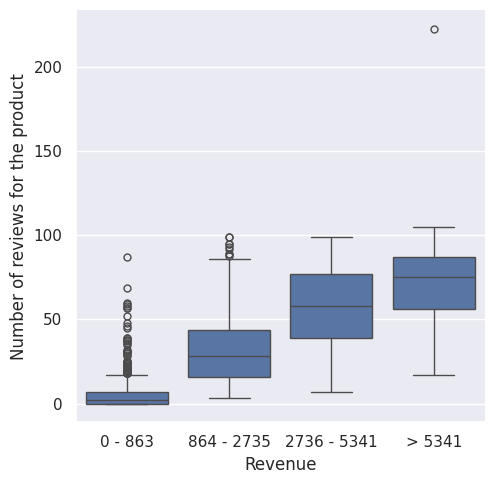

In [ ]:
ax = sns.catplot(data=encoded_df, x="revenue_cat", y="reviews", kind="box")
ax.set(xlabel='Revenue', ylabel='Number of reviews for the product')
plt.show()

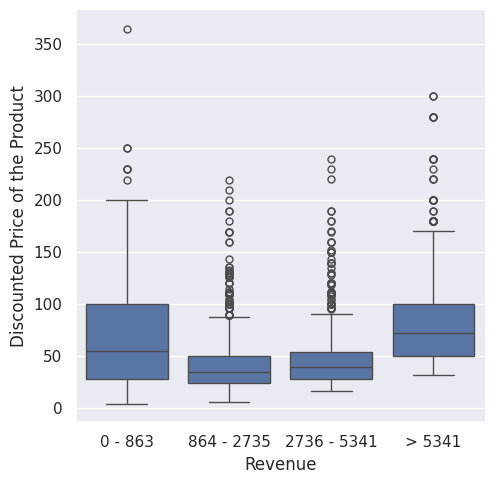

In [ ]:
ax = sns.catplot(data=encoded_df, x="revenue_cat", y="sale_price", kind="box")
ax.set(xlabel='Revenue', ylabel='Discounted Price of the Product')
plt.show()